In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr, f_oneway

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']  # This is the default LaTeX font
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 16, 'legend.fontsize': 14})
# Reading the data
df = pd.read_csv('current_analysis/xdbc_experiments_master.csv')
df.drop(columns=['client_readmode', 'table', 'host', 'date', 'run'], inplace=True)


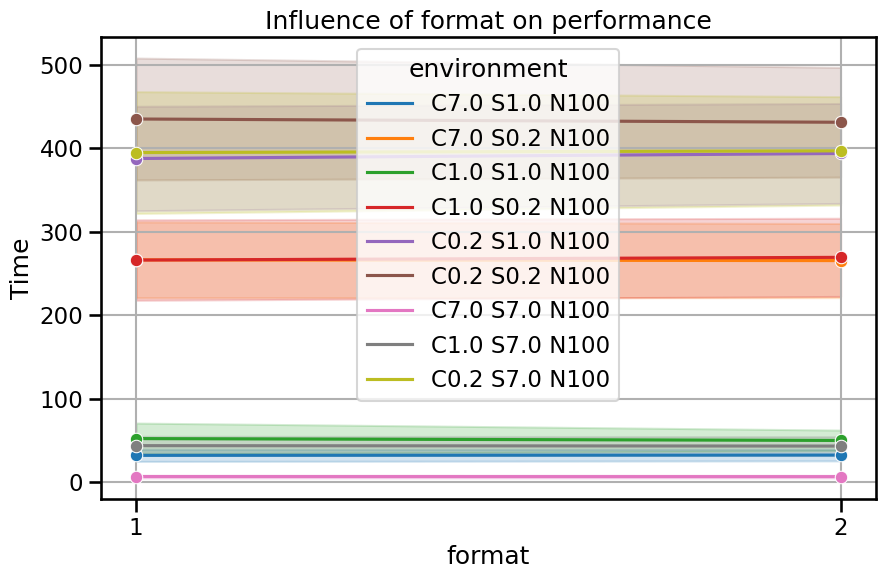

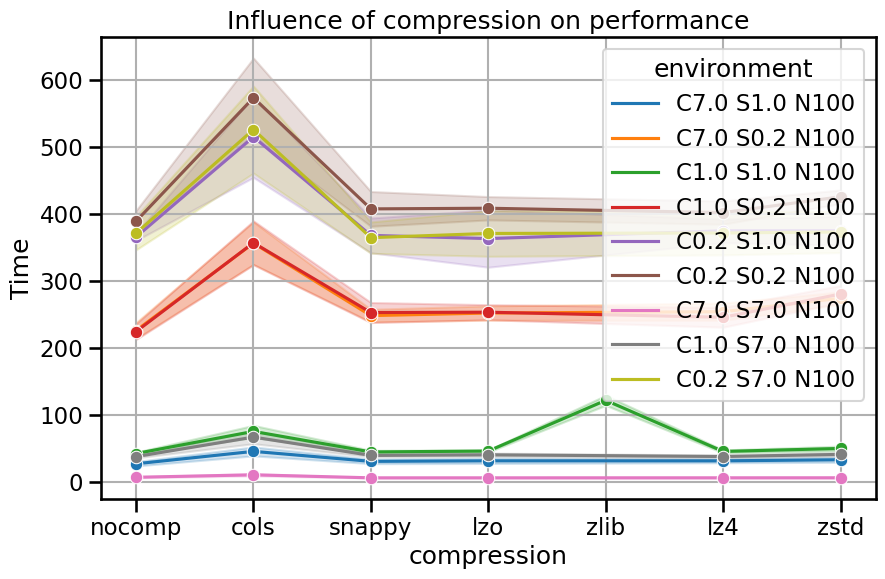

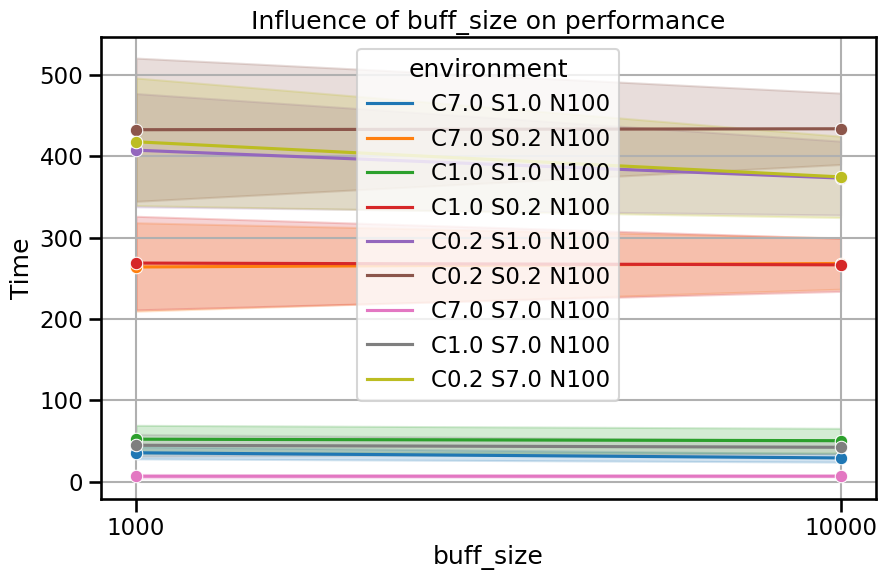

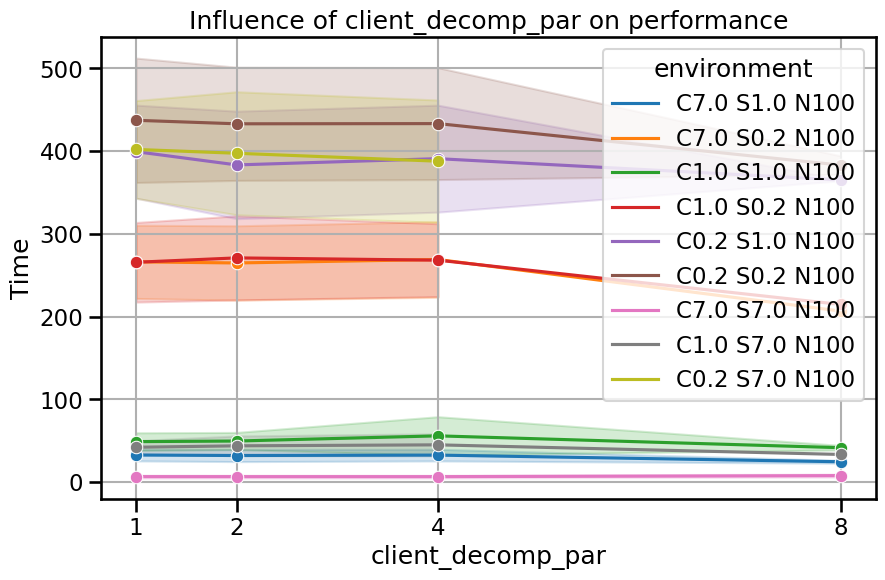

In [339]:
test_df = df.copy()
test_df = test_df[
    (test_df["system"] == "csv") &
    (test_df["bufpool_size"] == 1000) &
    (test_df["client_read_par"] == 4) &
    (test_df["server_read_partitions"] == 4) & 
    (test_df["server_read_par"] == 4) & 
    (test_df["server_deser_par"] == 4) & 
    (test_df["network_parallelism"] == 1) &
    (test_df["network"] == 100) 
]
test_df['environment'] = 'C' + test_df['client_cpu'].astype(str) + ' S' + test_df['server_cpu'].astype(str) + ' N' + test_df['network'].astype(str)
#display(test_df.head(10))
# Server parameters to plot
comp_params = ["format", "compression", "buff_size", "client_decomp_par"]

for param in comp_params:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=test_df, x=param, y="time", hue="environment", errorbar="sd", marker="o")
    plt.title(f"Influence of {param} on performance")
    plt.ylabel("Time")
    plt.xticks(test_df[param].unique())  # Set xticks to only have values present in the data
    plt.grid(True)
    plt.show()


In [304]:
# Define the columns of interest
columns_of_interest = ['compression', 'format', 'network_parallelism', 'bufpool_size', 'buff_size', 'network',
                        'client_cpu', 'client_read_par', 'client_decomp_par', 'server_cpu',
                       'server_read_par', 'server_read_partitions', 'server_deser_par']

# Check for duplicates
duplicates = df[df.duplicated(subset=columns_of_interest, keep=False)]

# Display duplicates
display(duplicates)


compression  format  network_parallelism  bufpool_size  buff_size  \
152        nocomp       1                    1          1000       1000   
237        nocomp       1                    1          1000       1000   
267        nocomp       1                    1          1000       1000   
552        nocomp       1                    1          1000       1000   
890        nocomp       1                    1          1000       1000   
944        nocomp       1                    1          1000       1000   
1115       nocomp       1                    1          1000       1000   
1118       nocomp       1                    1          1000       1000   
1137       nocomp       1                    1          1000       1000   
1179       nocomp       1                    1          1000       1000   
1276       nocomp       1                    1          1000       1000   
1278       nocomp       1                    1          1000       1000   
1451       nocomp       1                    1          1000       1000   
1484       nocomp       1                    1          1000       1000   
1488       nocomp       1                    1          1000       1000   
1804       nocomp       1                    1          1000       1000   
1823       nocomp       1                    1          1000       1000   
2053       nocomp       1                    1          1000       1000   
2170       nocomp       1                    1          1000       1000   
2206       nocomp       1                    1          1000       1000   
2628       nocomp       1                    1          1000       1000   
2720       nocomp       1                    1          1000       1000   
2739       nocomp       1                    1          1000       1000   
2809       nocomp       1                    1          1000       1000   
2871       nocomp       1                    1          1000       1000   
2961       nocomp       1                    1          1000       1000   
2974       nocomp       1                    1          1000       1000   
2992       nocomp       1                    1          1000       1000   
3090       nocomp       1                    1          1000       1000   
4803       nocomp       1                    1          1000       1000   
4812       nocomp       1                    1          1000       1000   
4932       nocomp       1                    1          1000       1000   
5247       nocomp       1                    1          1000       1000   
5321       nocomp       1                    1          1000       1000   
5628       nocomp       1                    1          1000       1000   
5780       nocomp       1                    1          1000       1000   
5819       nocomp       1                    1          1000       1000   
5987       nocomp       1                    1          1000       1000   
6178       nocomp       1                    1          1000       1000   
6395       nocomp       1                    1          1000       1000   
6460       nocomp       1                    1          1000       1000   
6552       nocomp       1                    1          1000       1000   
6979       nocomp       1                    1          1000       1000   
7225       nocomp       1                    1          1000       1000   
7340       nocomp       1                    1          1000       1000   
7578       nocomp       1                    1          1000       1000   
7637       nocomp       1                    1          1000       1000   
7908       nocomp       1                    1          1000       1000   
8203       nocomp       1                    1          1000       1000   
8318       nocomp       1                    1          1000       1000   
8552       nocomp       1                    1          1000       1000   
8570       nocomp       1                    1          1000       1000   
8826       nocomp       1      

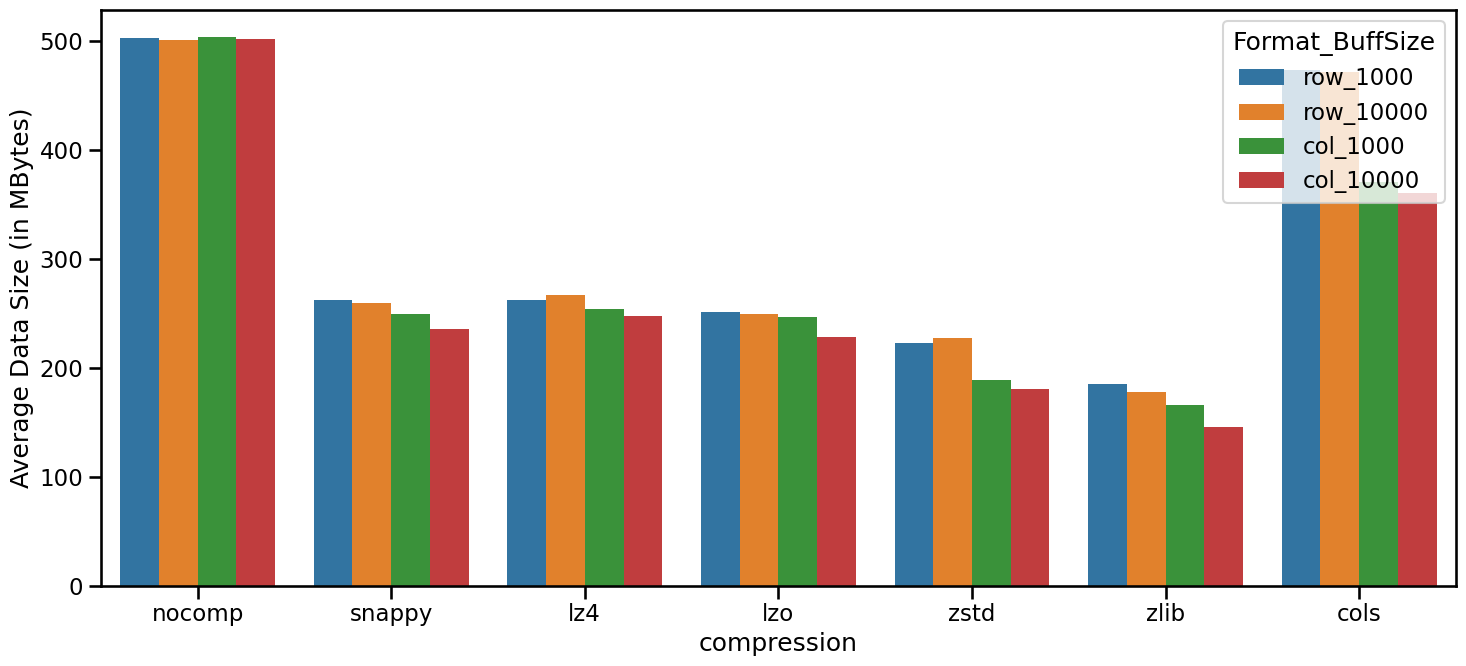

In [311]:
# Filter for desired parameters
filtered_df = df[df['format'].isin([1, 2])]

# Convert datasize to MBytes
filtered_df['datasize_MBytes'] = filtered_df['datasize'] * 1e-6

# Create a new column combining format and buff_size for hue differentiation
filtered_df['format_buff'] = filtered_df['format'].replace({1: 'row', 2: 'col'}) + "_" + filtered_df['buff_size'].map(str)

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(data=filtered_df, x='compression', y='datasize_MBytes', hue='format_buff', estimator=np.mean, errorbar=None)

# Adjust the y-label and the legend
plt.ylabel('Average Data Size (in MBytes)')
plt.legend(title='Format_BuffSize', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

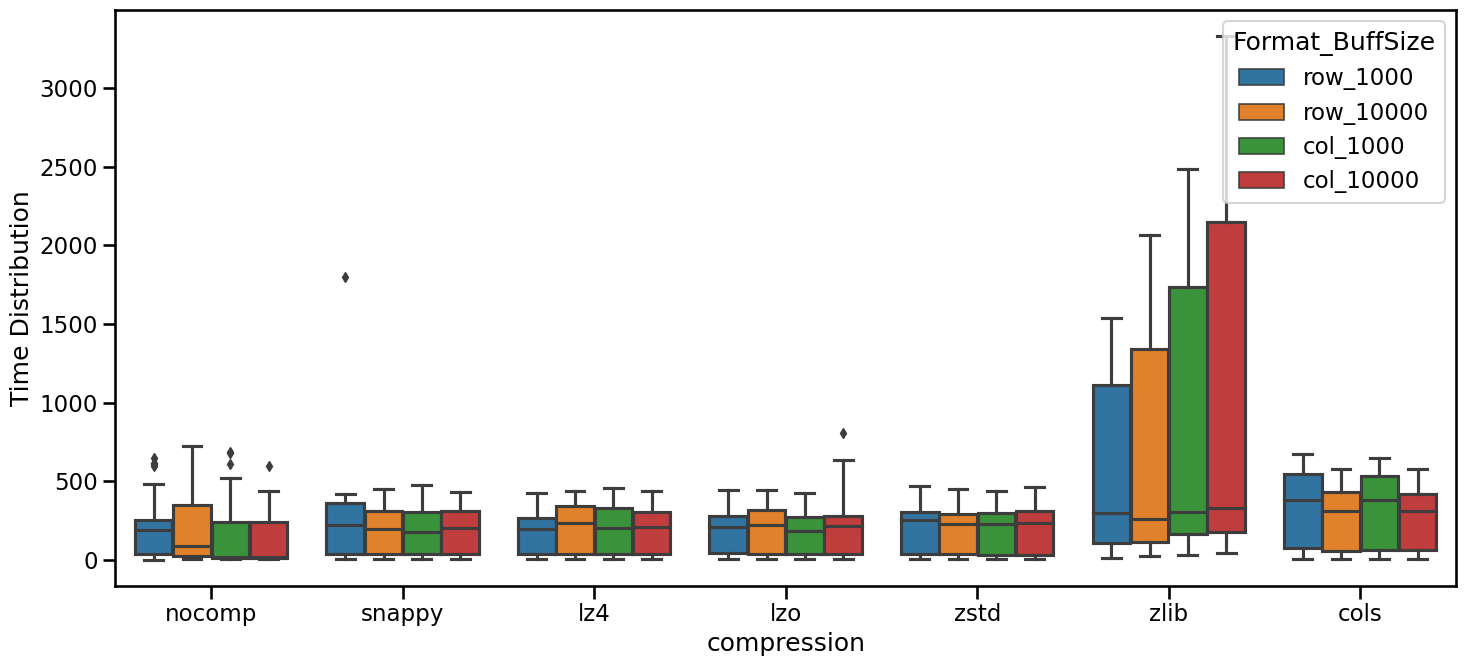

In [312]:
# Filter for desired parameters
filtered_df = df[df['format'].isin([1, 2])].copy()

# Create a new column combining format and buff_size for hue differentiation
filtered_df['format_buff'] = filtered_df['format'].replace({1: 'row', 2: 'col'}) + "_" + filtered_df['buff_size'].map(str)

# Create the boxplot
plt.figure(figsize=(15, 7))
sns.boxplot(data=filtered_df, x='compression', y='time', hue='format_buff')

# Adjust the y-label and the legend
plt.ylabel('Time Distribution')
plt.legend(title='Format_BuffSize', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [340]:


# Define a function to get the row with the minimum time within a group
def get_min_time_row(group):
    return group.loc[group['time'].idxmin()]

# Group by client_cpu, server_cpu, and network, then apply the function
best_configs_df = df.groupby(['client_cpu', 'server_cpu', 'network']).apply(get_min_time_row).reset_index(drop=True)

# Sort by client_cpu, server_cpu, and network for readability
best_configs_df = best_configs_df.sort_values(by=['client_cpu', 'server_cpu', 'network'])

cols_order = ['client_cpu', 'server_cpu', 'network', 'time'] + [col for col in best_configs_df.columns if col not in ['client_cpu', 'server_cpu', 'network', 'time']]
best_configs_df = best_configs_df[cols_order]

# Calculate aggregated metrics for each group
grouped = df.groupby(['client_cpu', 'server_cpu', 'network'])
agg_metrics = grouped['time'].agg(['min', 'mean', lambda x: x.nsmallest(2).iloc[-1] if len(x) > 1 else x.min(), 'max'])
agg_metrics.columns = ['min_time', 'avg_time', 'second_best_time', 'max_time']

# Merge aggregated metrics to best_configs_df
best_configs_df = best_configs_df.merge(agg_metrics, left_on=['client_cpu', 'server_cpu', 'network'], right_index=True)

# Calculate the three new columns
best_configs_df['diff_from_second'] = best_configs_df['time'] - best_configs_df['second_best_time']
best_configs_df['diff_from_avg'] = best_configs_df['time'] - best_configs_df['avg_time']
best_configs_df['diff_from_worst'] = best_configs_df['max_time'] - best_configs_df['time']

# Reorder columns
cols_order = ['client_cpu', 'server_cpu', 'network', 'time', 'diff_from_second', 'diff_from_avg', 'diff_from_worst'] + [col for col in best_configs_df.columns if col not in ['client_cpu', 'server_cpu', 'network', 'time', 'diff_from_second', 'diff_from_avg', 'diff_from_worst']]
best_configs_df = best_configs_df[cols_order]

# Display the resulting dataframe
display(best_configs_df)

client_cpu  server_cpu  network    time  diff_from_second  diff_from_avg  \
0          0.2         0.2        6   14.13           -201.42    -350.598509   
1          0.2         0.2       50   17.86           -192.04    -362.448559   
2          0.2         0.2      100  203.46             -7.67    -162.081409   
3          0.2         1.0        6  233.07             -2.01     -99.445983   
4          0.2         1.0       50  180.67             -1.88    -144.496862   
5          0.2         1.0      100   85.67           -107.50    -230.268298   
6          0.2         7.0        6   20.43            -17.83    -342.899279   
7          0.2         7.0       50  159.89             -7.47    -189.635111   
8          0.2         7.0      100  161.15            -27.36    -136.772479   
9          1.0         0.2        6   16.71             -2.57    -230.902145   
10         1.0         0.2       50  113.49             -1.13    -135.843571   
11         1.0         0.2      100  116.17             -0.69    -130.372839   
12         1.0         1.0        6   31.23             -0.01     -52.258301   
13         1.0         1.0       50    7.34             -9.07     -29.513431   
14         1.0         1.0      100   22.72             -0.07     -14.772326   
15         1.0         7.0        6   12.06            -18.66     -43.468402   
16         1.0         7.0       50   18.09             -3.42     -20.284357   
17         1.0         7.0      100   20.80             -0.21     -17.966749   
18         7.0         0.2        6  132.84             -0.09    -126.409692   
19         7.0         0.2       50  115.39             -0.57    -130.175883   
20         7.0         0.2      100    0.42            -12.06    -235.908118   
21         7.0         1.0        6   31.19             -0.04     -52.475041   
22         7.0         1.0       50   12.98             -0.03     -13.361232   
23         7.0         1.0      100    0.46             -3.96     -26.052694   
24         7.0         7.0        6    7.49            -23.61     -48.479149   
25         7.0         7.0       50    5.34             -0.03     -14.007080   
26         7.0         7.0      100    5.27             -0.01      -6.896289   

    diff_from_worst    system compression  format  network_parallelism  \
0           3240.83       csv      snappy       2                    2   
1           3218.97       csv        zstd       2                    1   
2           3045.90       csv      nocomp       1                    1   
3            373.90       csv      nocomp       1                    1   
4            488.30       csv      nocomp       1                    1   
5            589.01       csv        zstd       1                    1   
6            640.50       csv        zstd       2                    4   
7            506.47       csv        zstd       1                    2   
8            565.39       csv        zstd       1                    2   
9           3279.71       csv      nocomp       2                    2   
10          3156.94       csv      nocomp       1                    2   
11          3125.11       csv      nocomp       1                    1   
12           332.33       csv        zstd       2                    4   
13           352.14       csv      nocomp       2                    1   
14           325.22       csv      nocomp       1                    1   
15           145.01       csv      snappy       1                    1   
16           138.38       csv         lzo       2                    1   
17           135.48       csv      nocomp       1                    1   
18          3080.35       csv      nocomp       1                    1   
19          3112.52       csv      nocomp       1                    1   
20          3329.71  postgres      nocomp       1                    1   
21           326.61       csv        zstd       2                    1   
22           348.86       csv      nocomp       2            

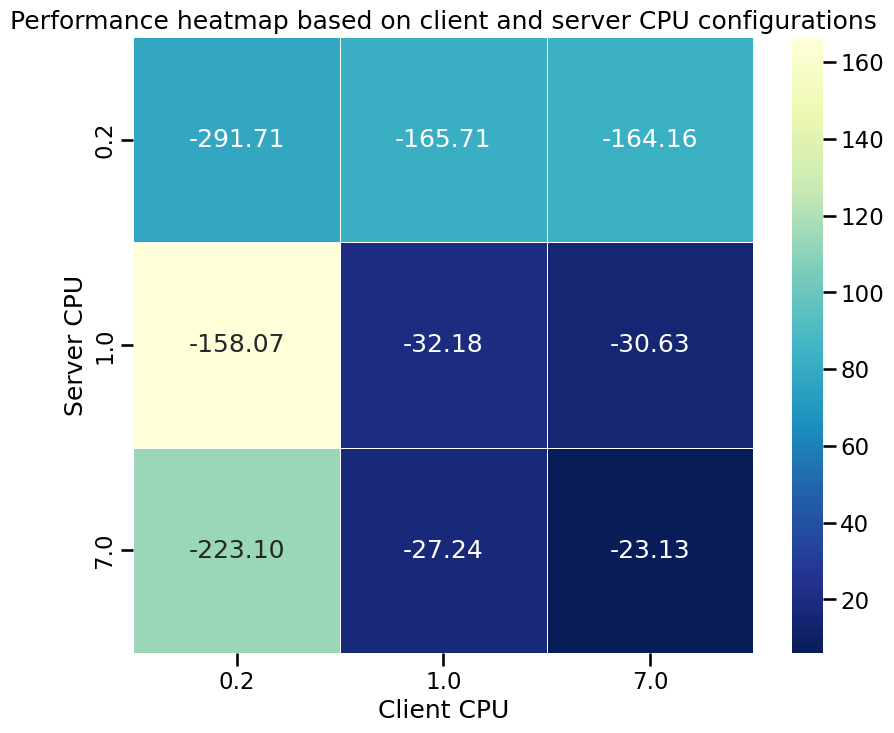

In [315]:
# First, pivot the data to match the heatmap design.
heatmap_data = best_configs_df.pivot_table(
    values='time',
    index='server_cpu',
    columns='client_cpu',
    aggfunc='mean'
)

# Similarly, create a pivot for annotations.
annotation_data = best_configs_df.pivot_table(
    values='diff_from_avg',
    index='server_cpu',
    columns='client_cpu',
    aggfunc='mean'
).applymap(lambda x: round(x, 2))  # Round off for better readability

# Now, let's create the heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=annotation_data, cmap='YlGnBu_r', linewidths=.5, fmt=".2f")

# Additional heatmap settings.
plt.title('Performance heatmap based on client and server CPU configurations')
plt.ylabel('Server CPU')
plt.xlabel('Client CPU')
plt.show()

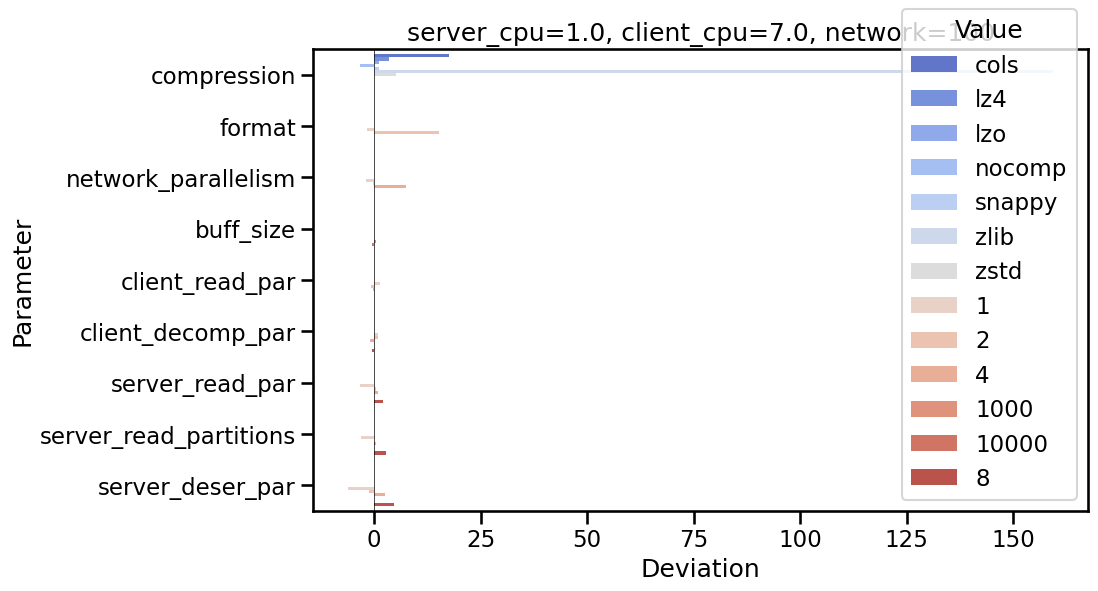

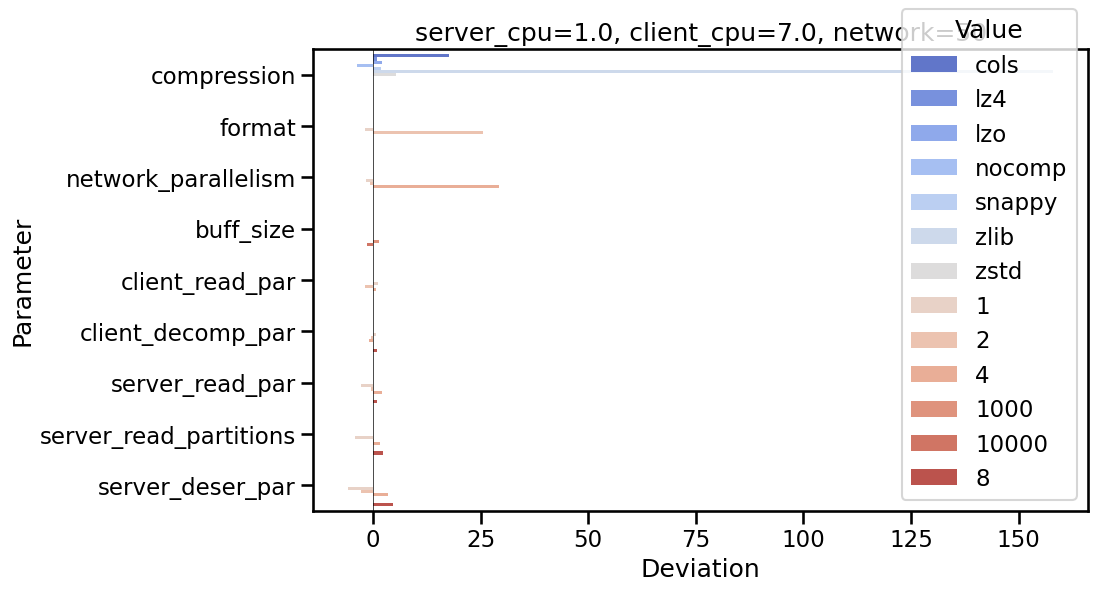

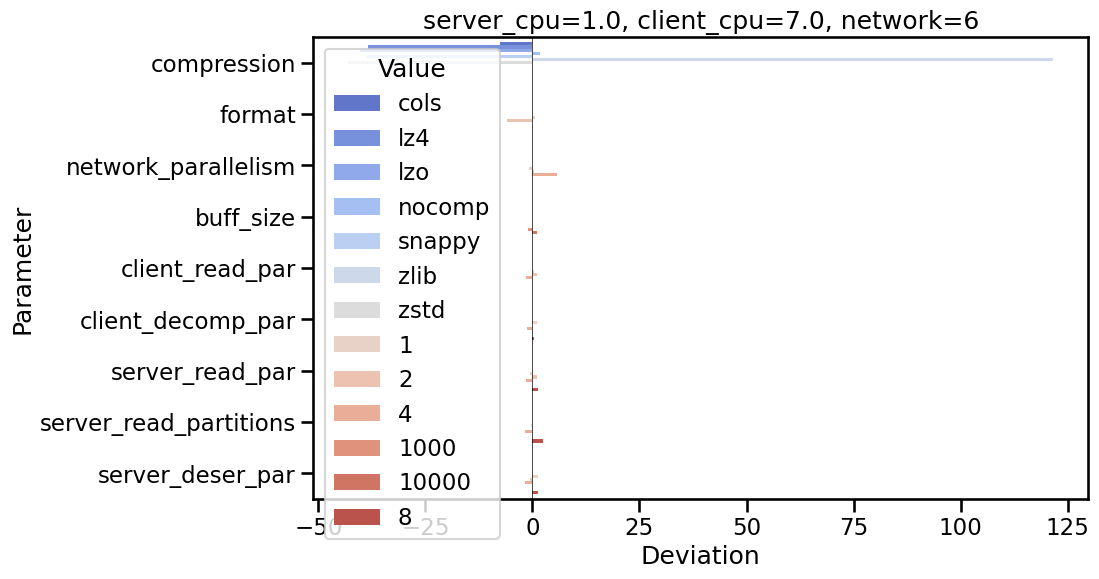

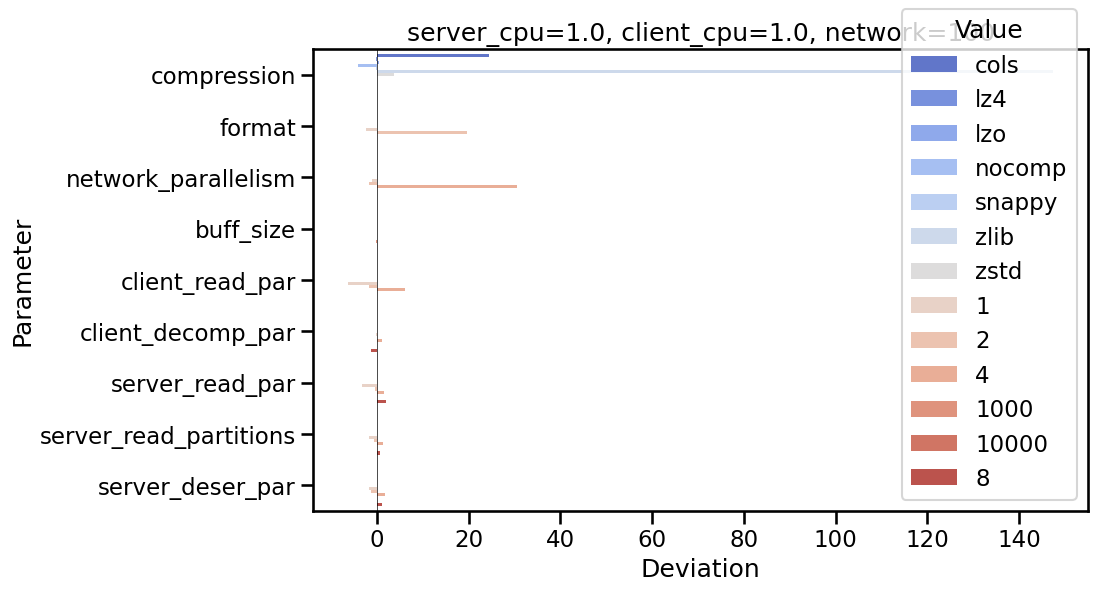

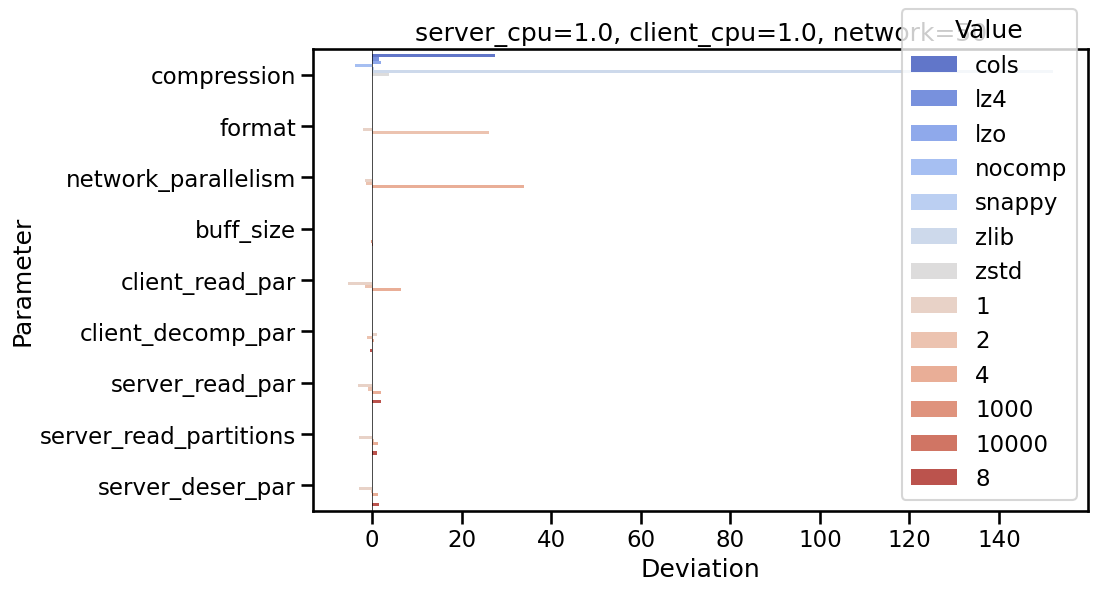

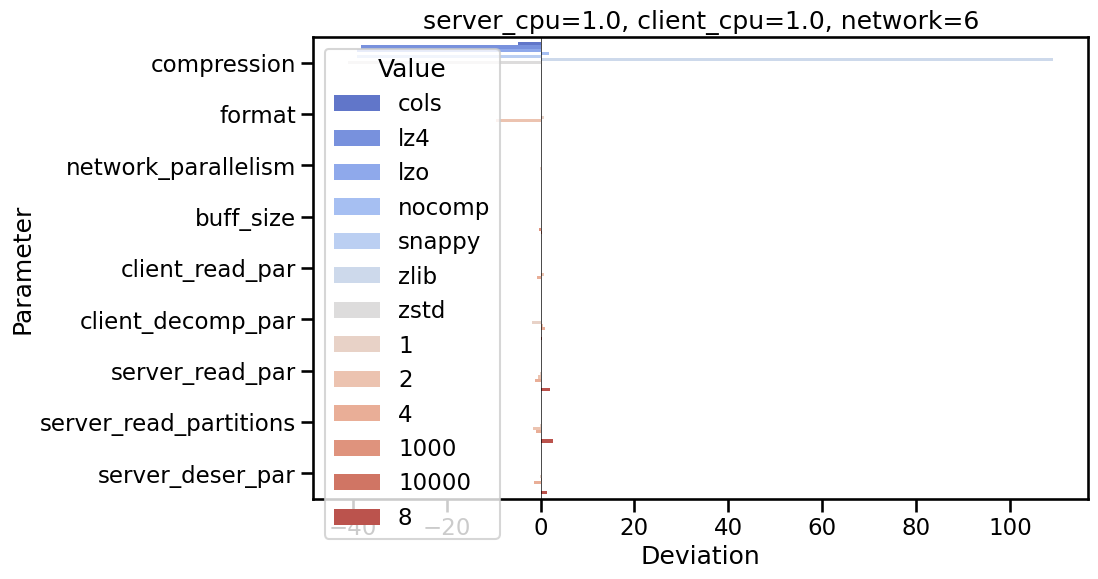

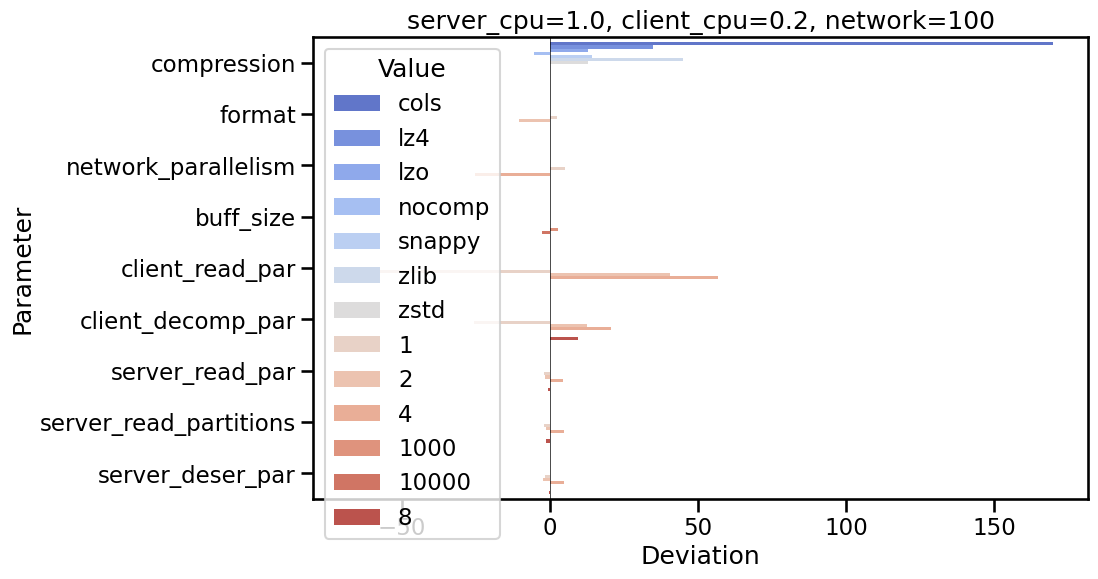

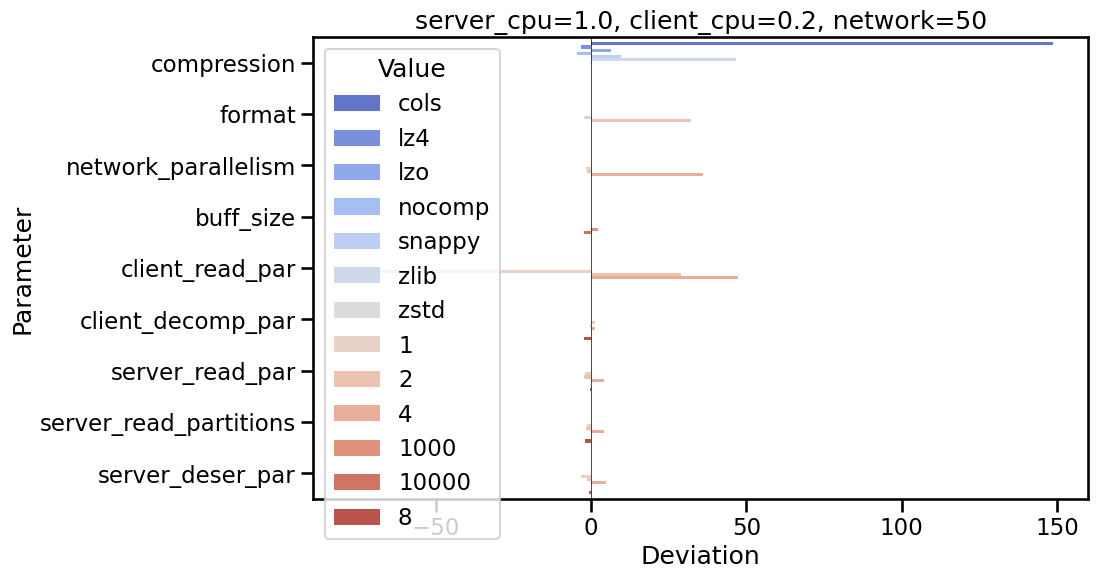

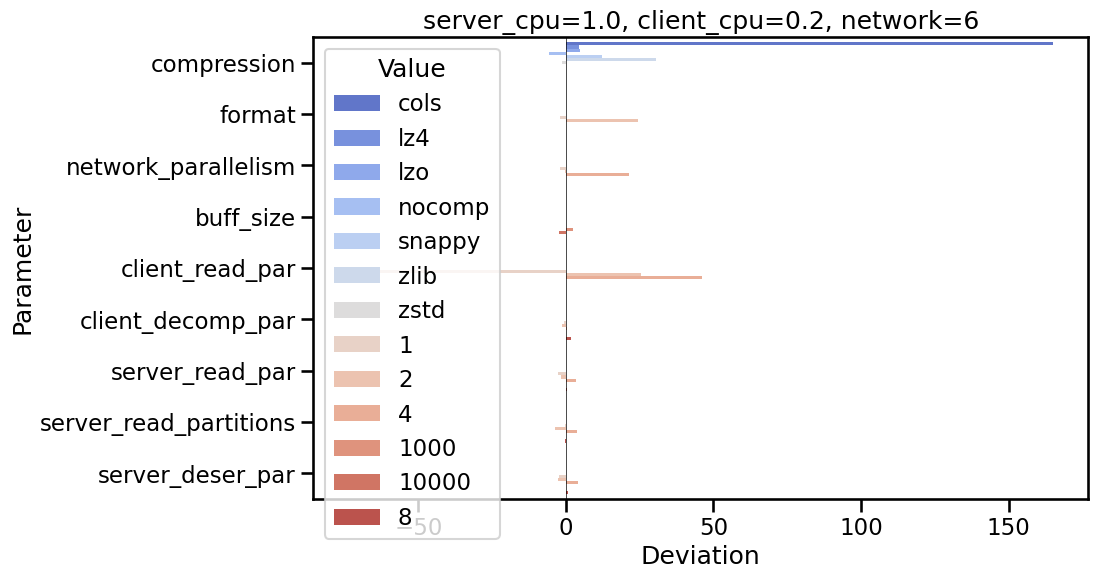

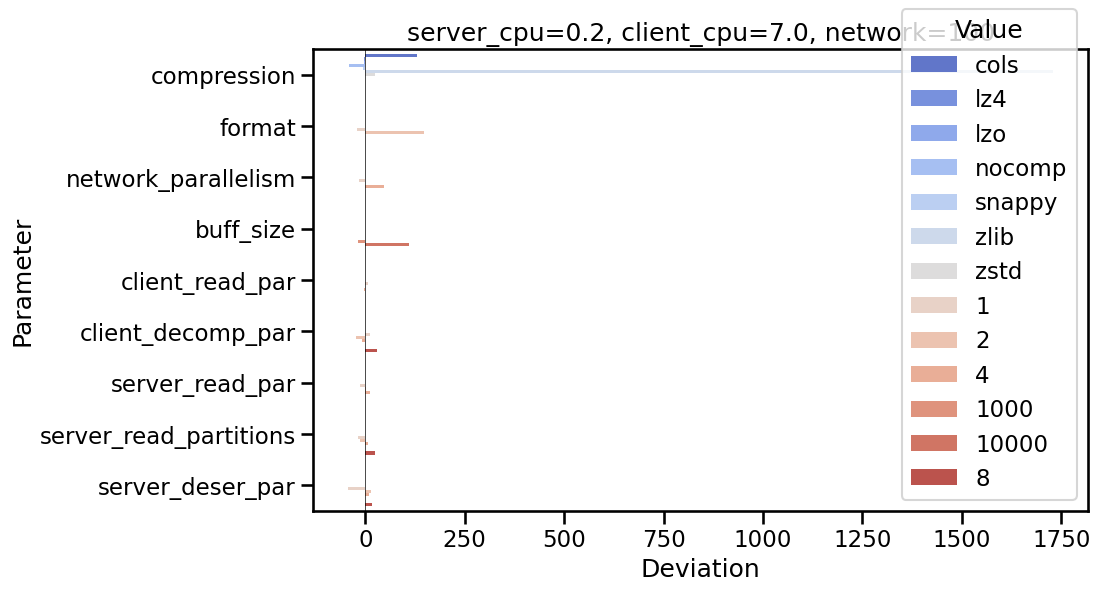

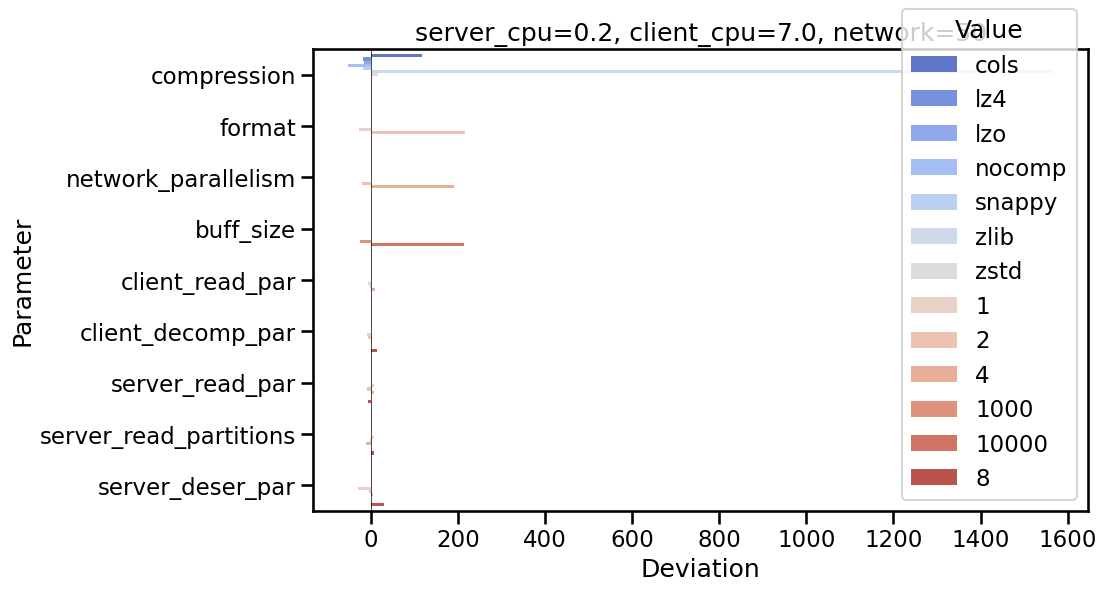

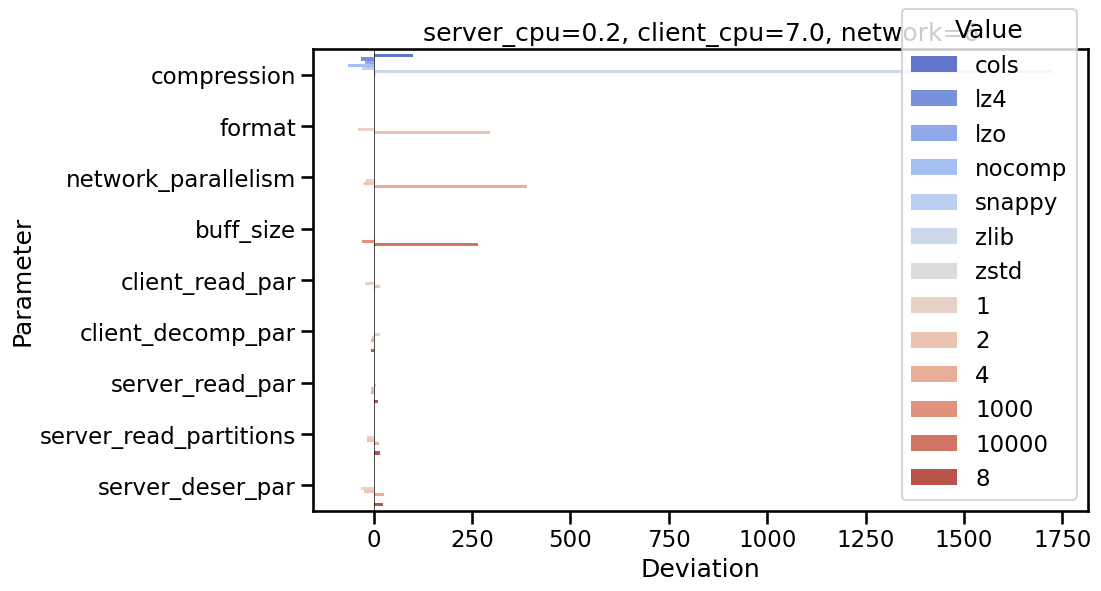

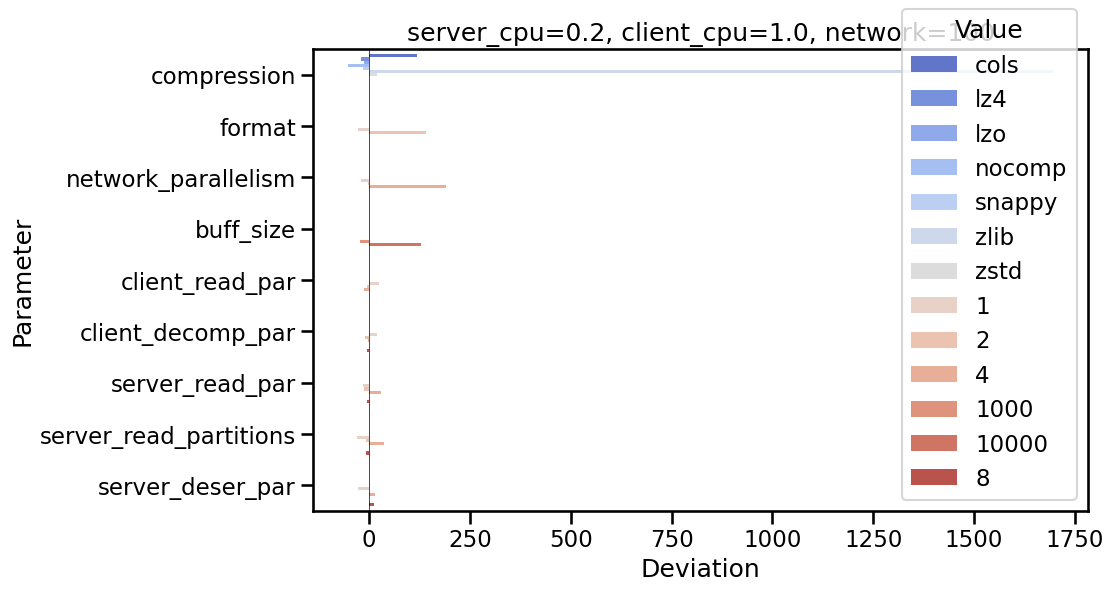

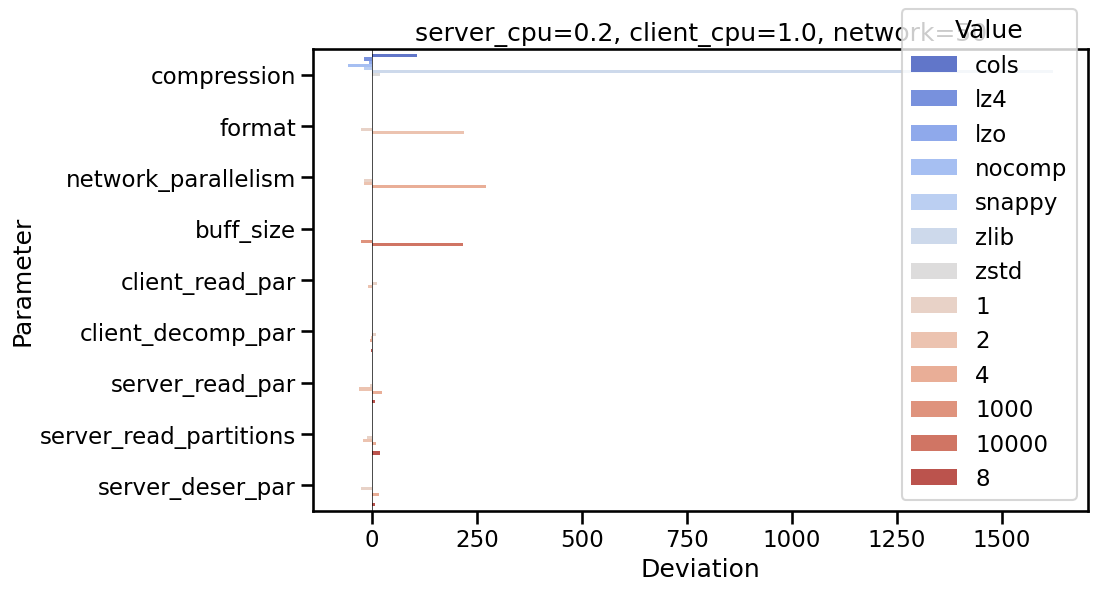

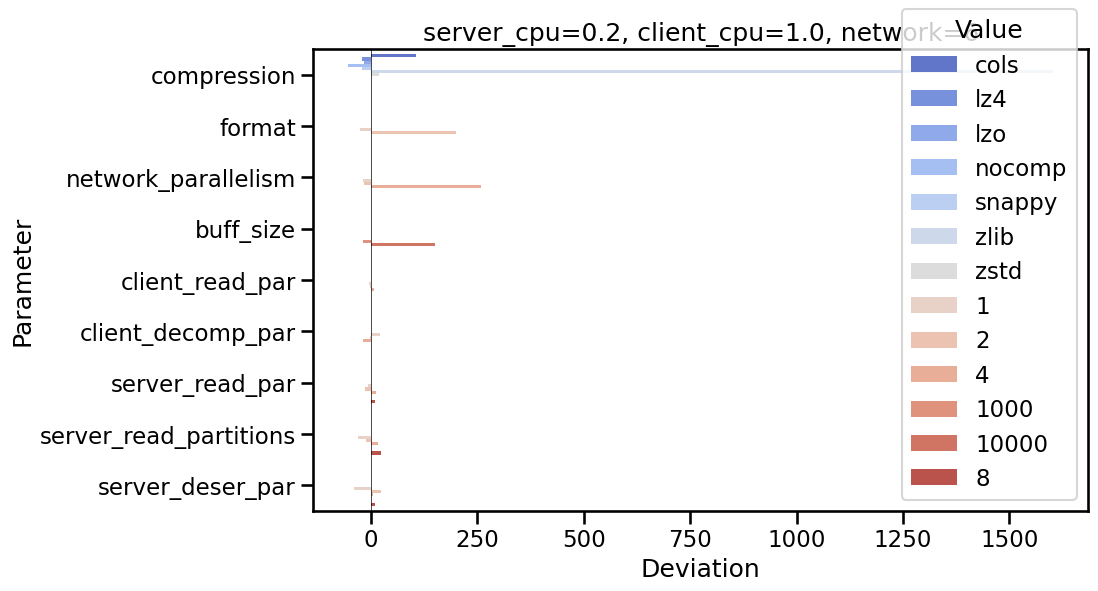

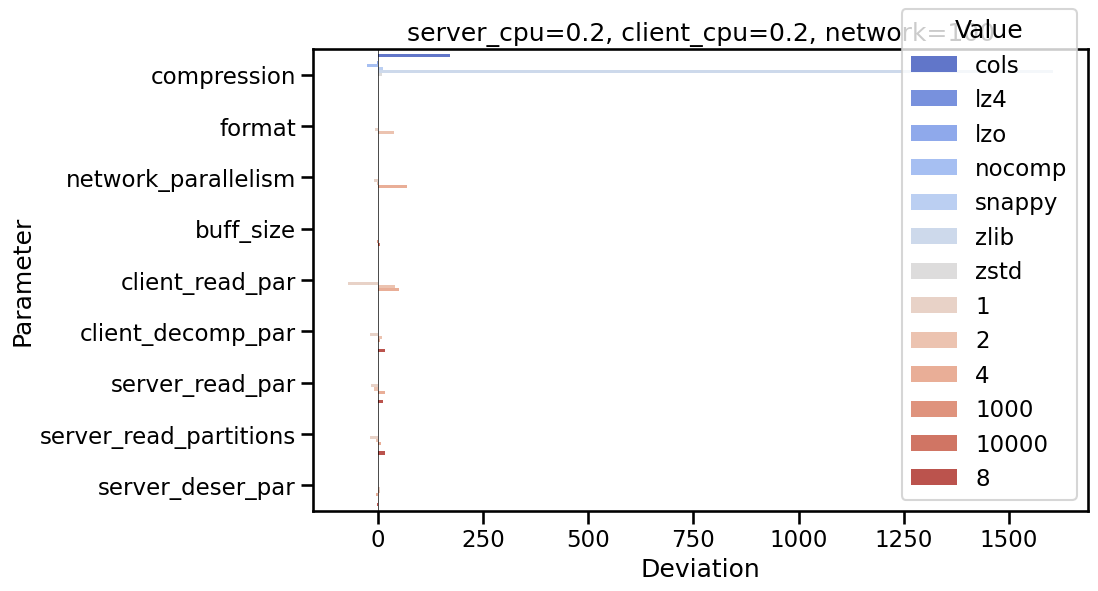

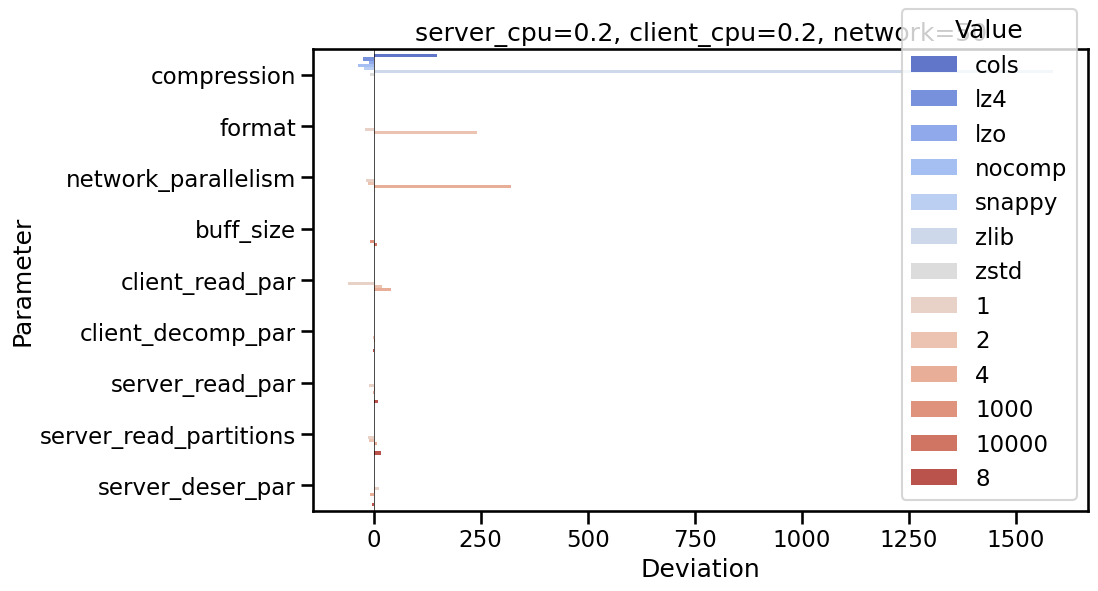

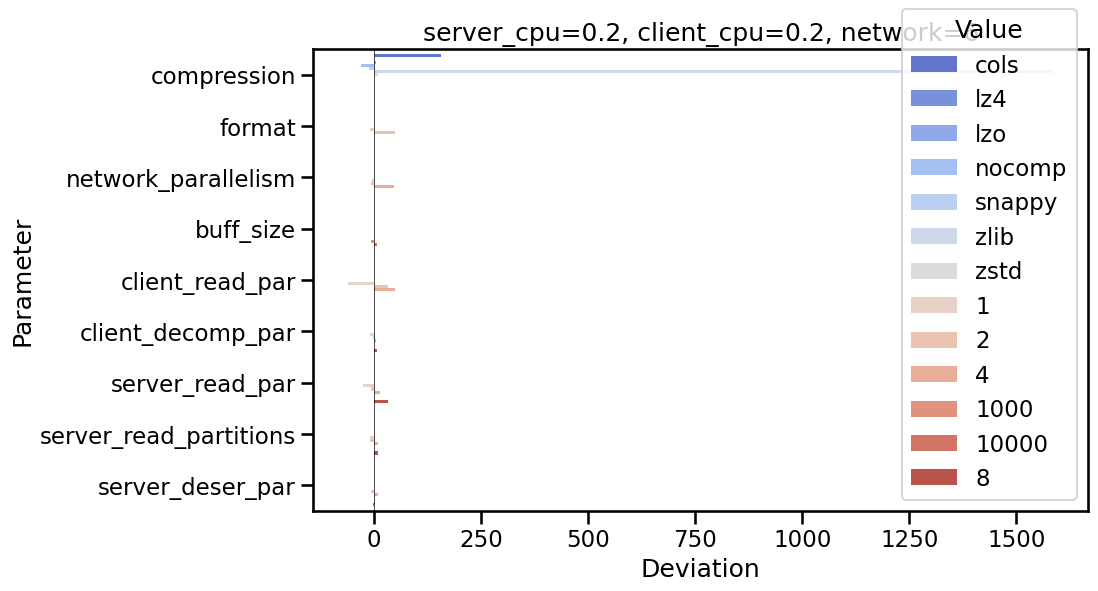

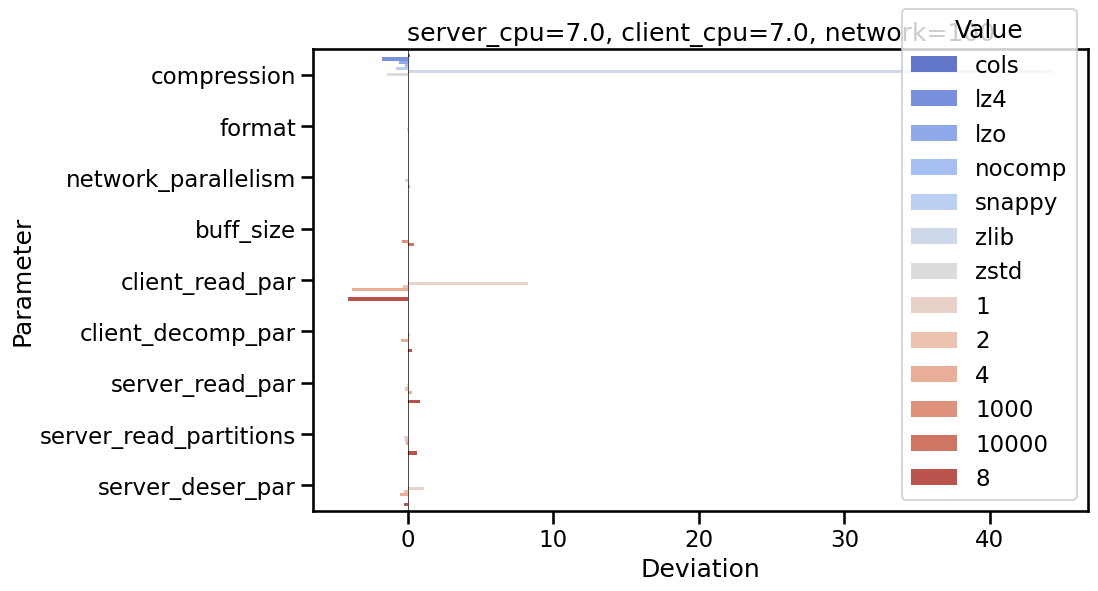

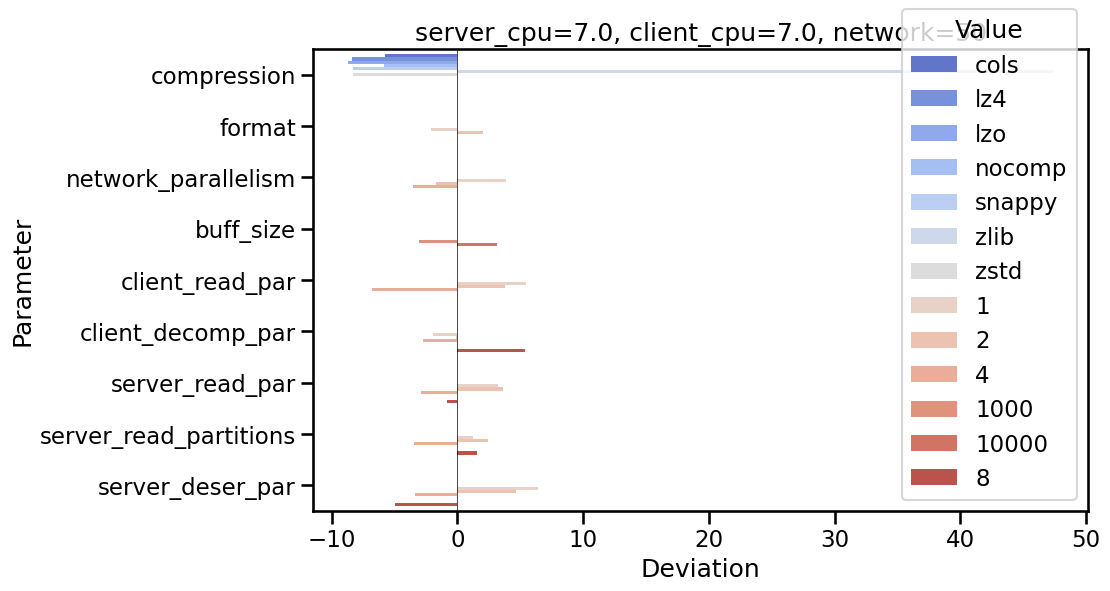

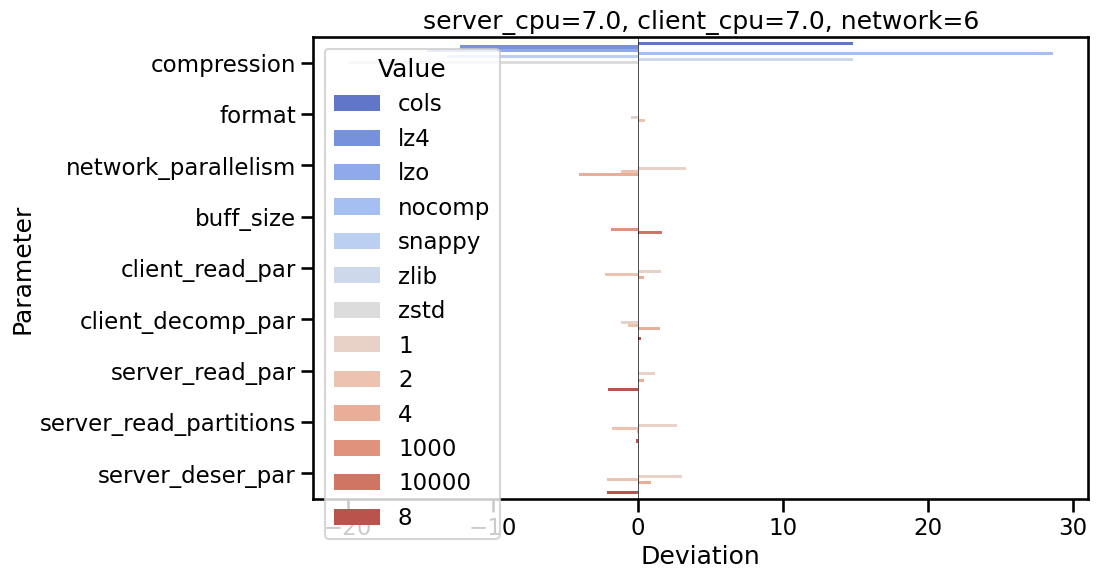

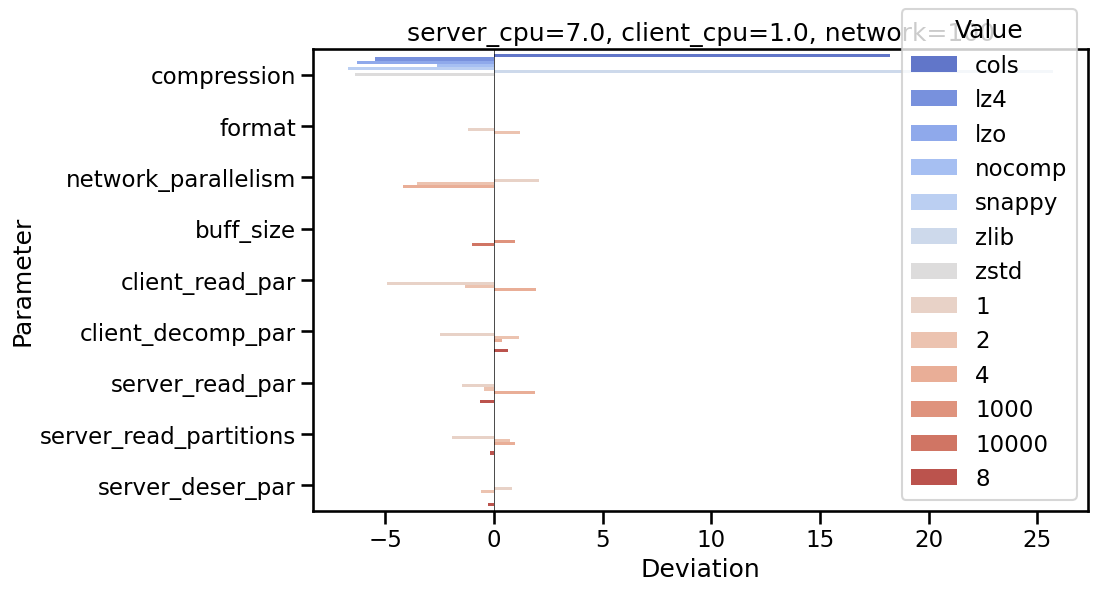

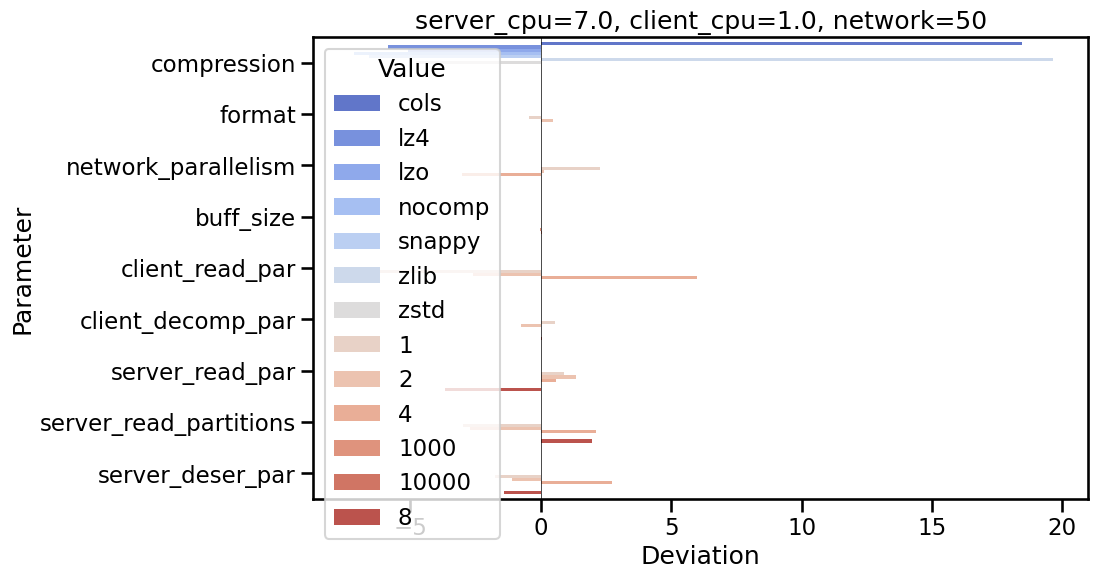

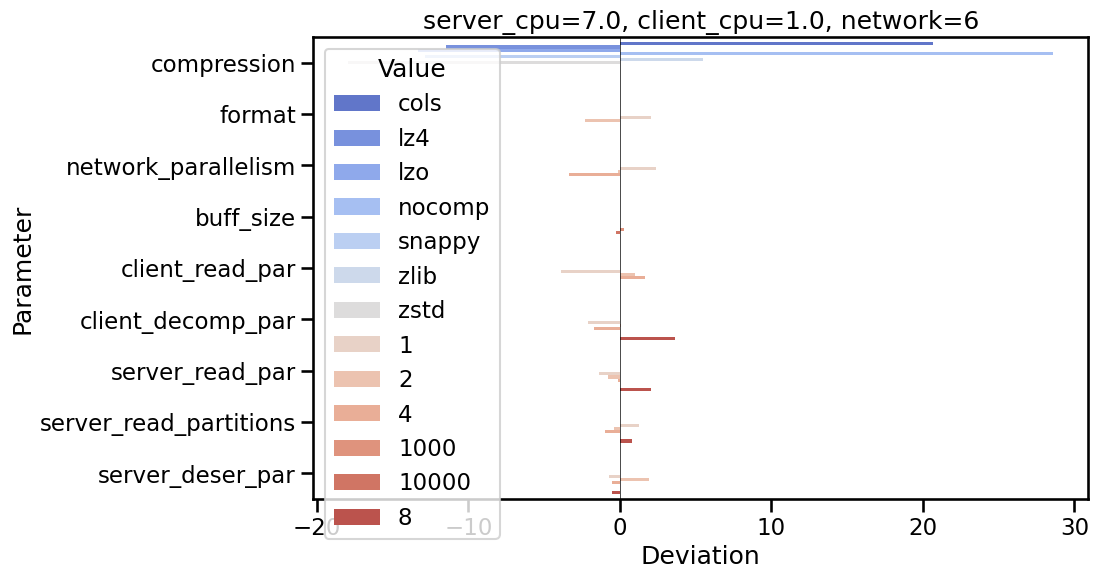

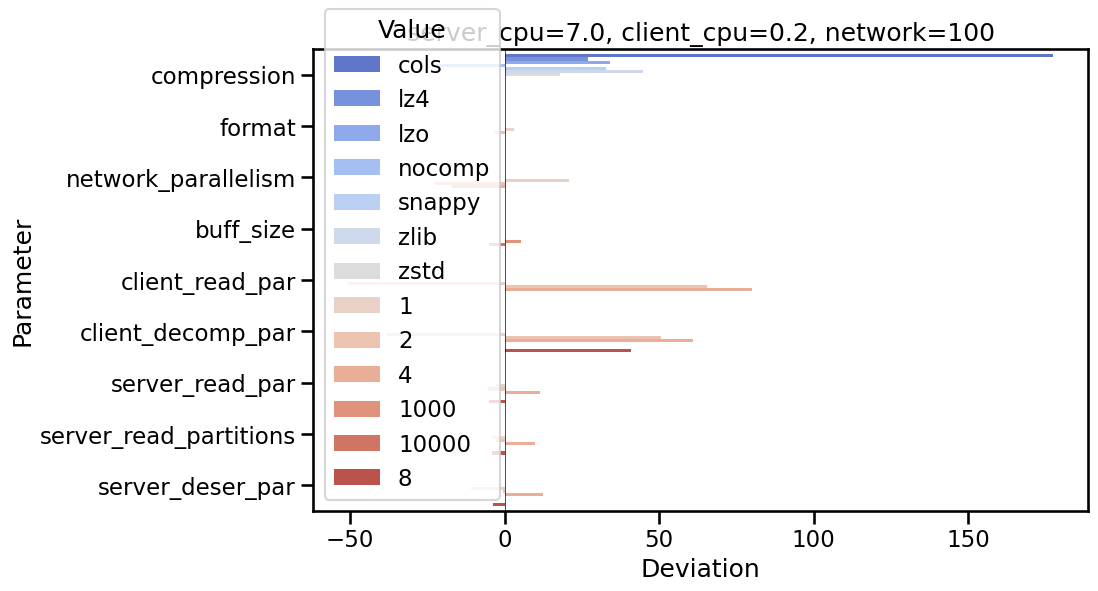

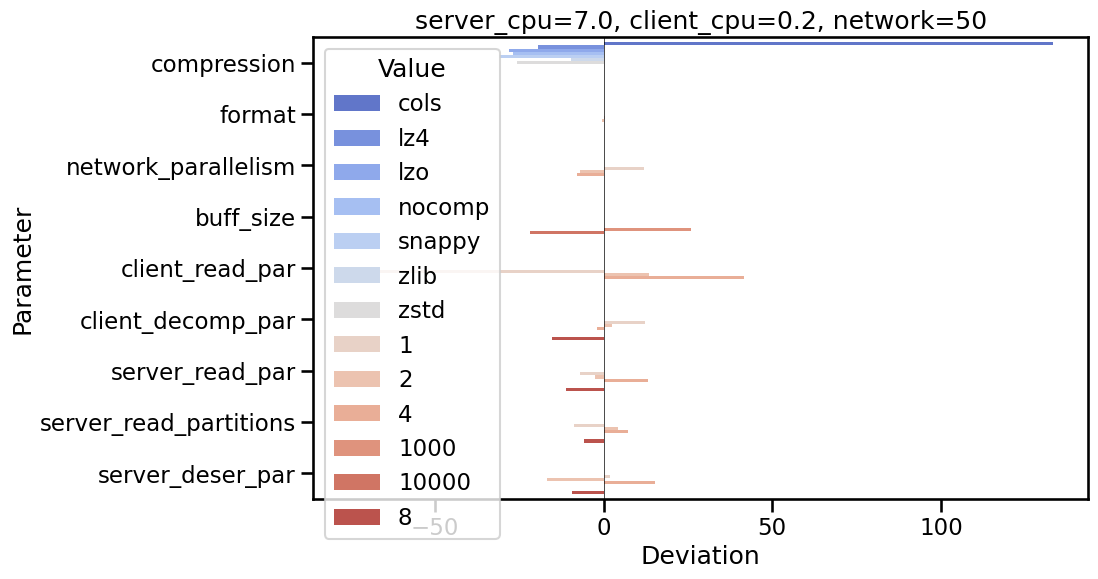

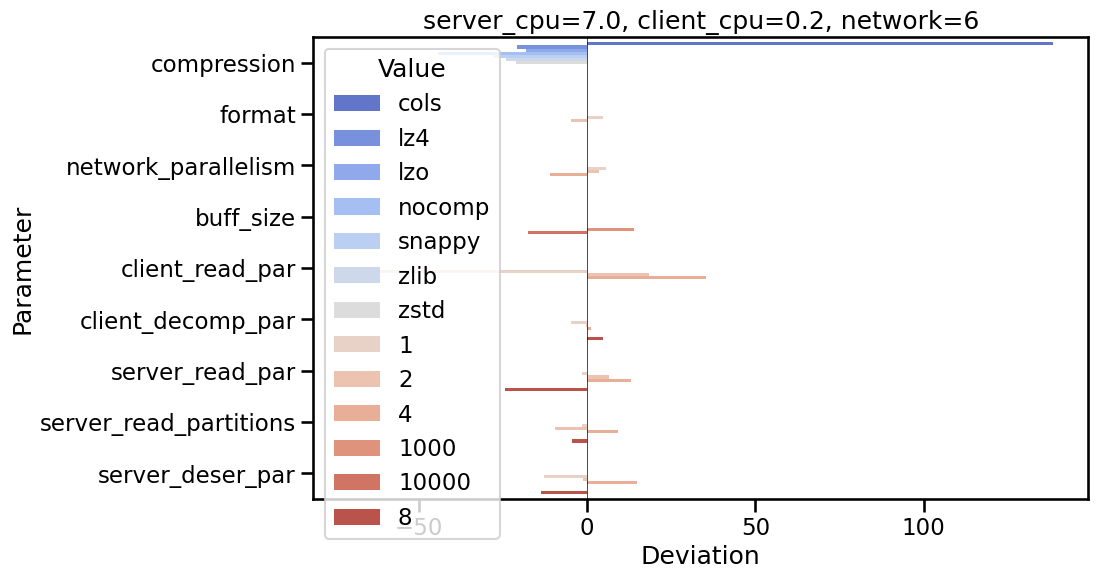

In [316]:


# Select columns of interest
exclude_cols = ["date", "host", "run", "system", "table", "bufpool_size", "time", "datasize", 
                "client_readmode", "server_cpu", "client_cpu", "network"]
cols = [col for col in df.columns if col not in exclude_cols]

unique_server_cpus = df['server_cpu'].unique()
unique_client_cpus = df['client_cpu'].unique()
unique_networks = df['network'].unique()

# Loop through each unique combination of server, client CPU, and network
for server_cpu in unique_server_cpus:
    for client_cpu in unique_client_cpus:
        for network in unique_networks:
            subset = df[(df['server_cpu'] == server_cpu) &
                        (df['client_cpu'] == client_cpu) &
                        (df['network'] == network)]
            
            if subset.empty:
                continue
                
            average_time = subset['time'].mean()
            
            deviations = {}
            
            for col in cols:
                col_means = subset.groupby(col)['time'].mean()
                deviations[col] = col_means - average_time
            
            # Flatten the deviations dictionary for plotting
            plot_data = []
            for key, value_series in deviations.items():
                for val, dev in value_series.items():
                    plot_data.append((key, val, dev))
            
            plot_df = pd.DataFrame(plot_data, columns=['Parameter', 'Value', 'Deviation'])
            
            # Plot
            plt.figure(figsize=(10, 6))
            sns.barplot(data=plot_df, x='Deviation', y='Parameter', hue='Value', orient='h', palette='coolwarm')
            plt.axvline(0, color='black', linewidth=0.5)
            plt.title(f"server_cpu={server_cpu}, client_cpu={client_cpu}, network={network}")
            plt.show()

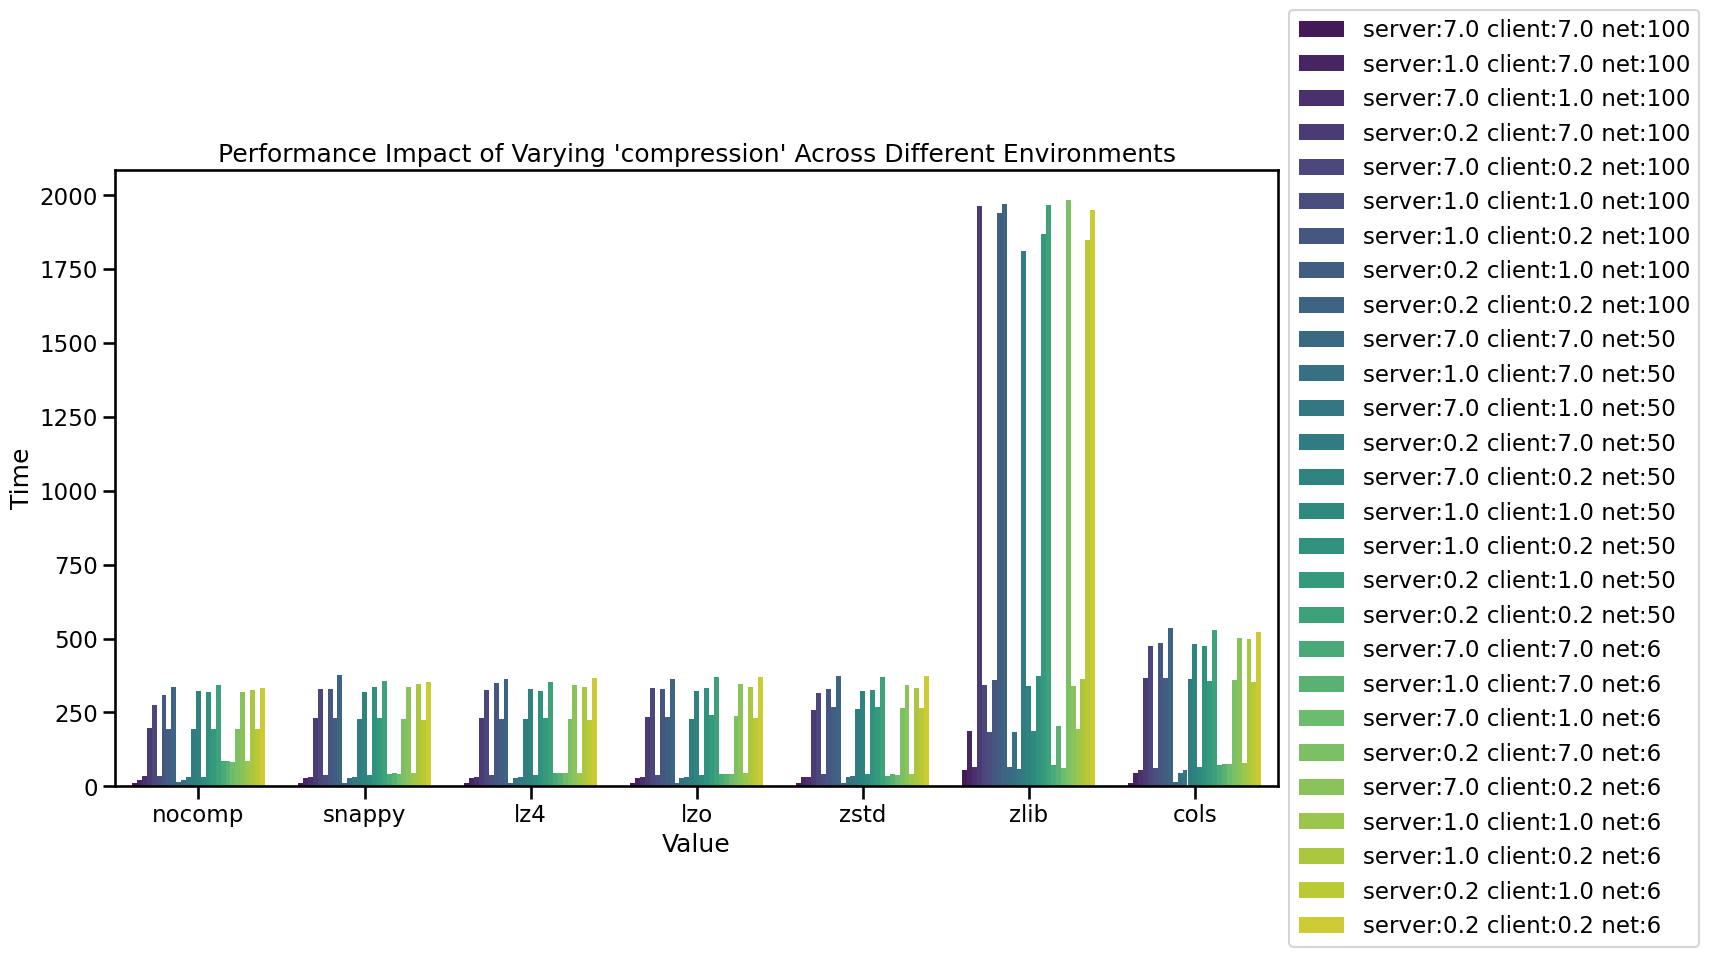

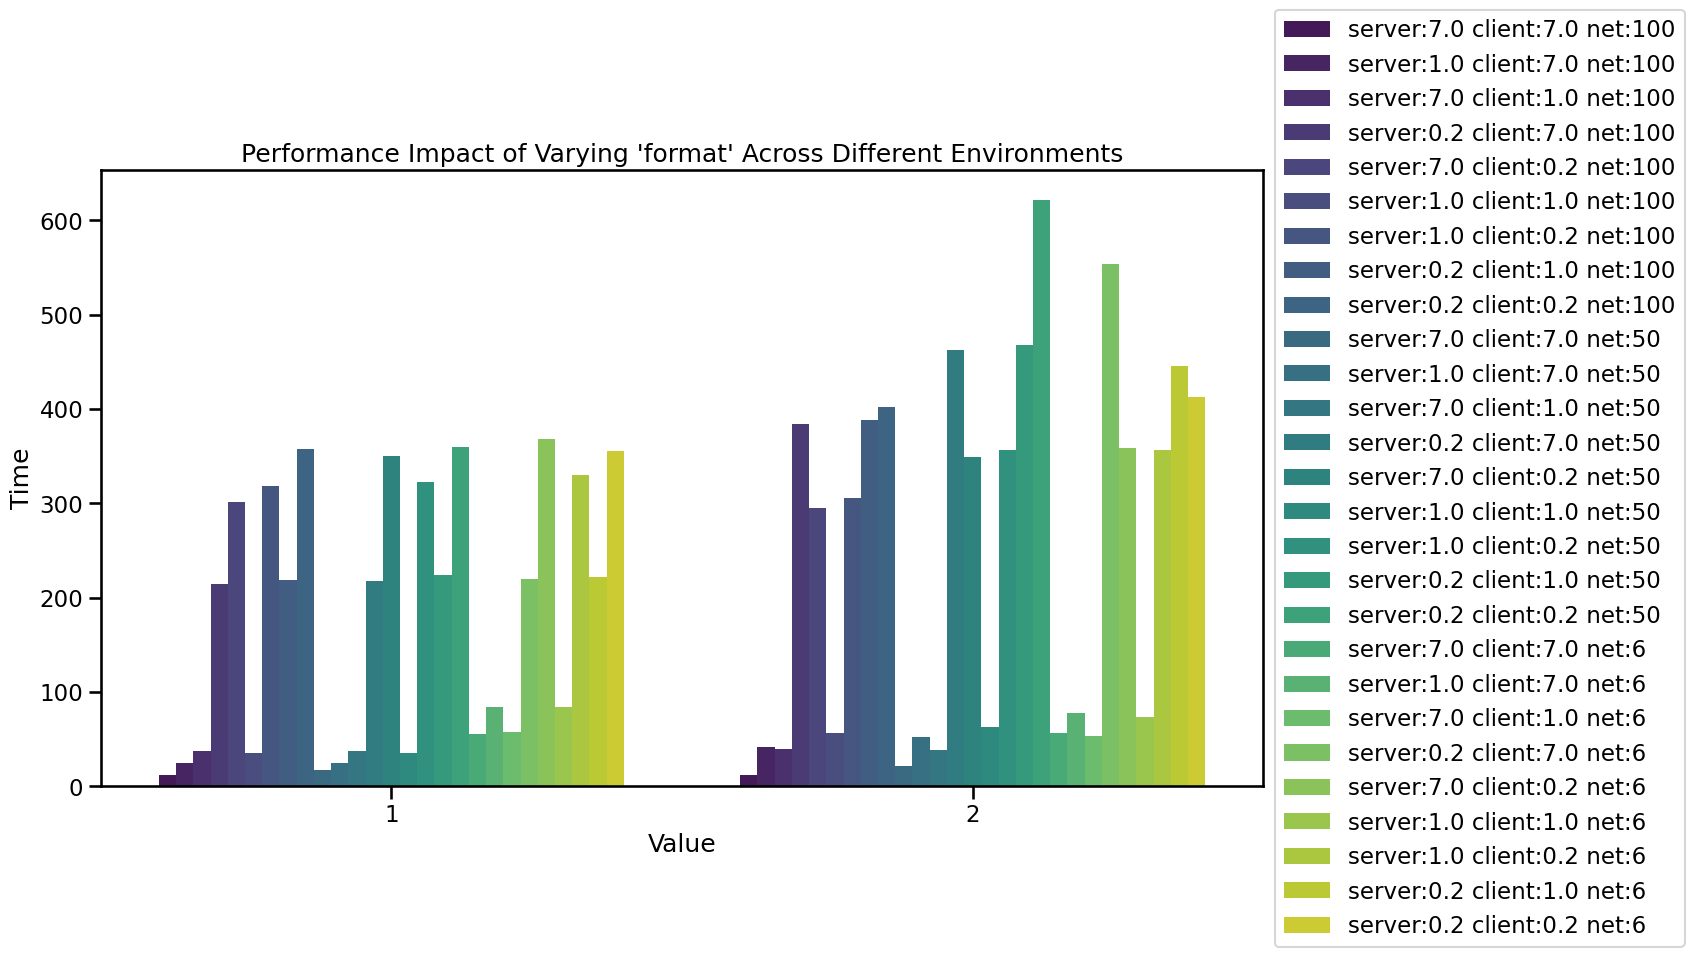

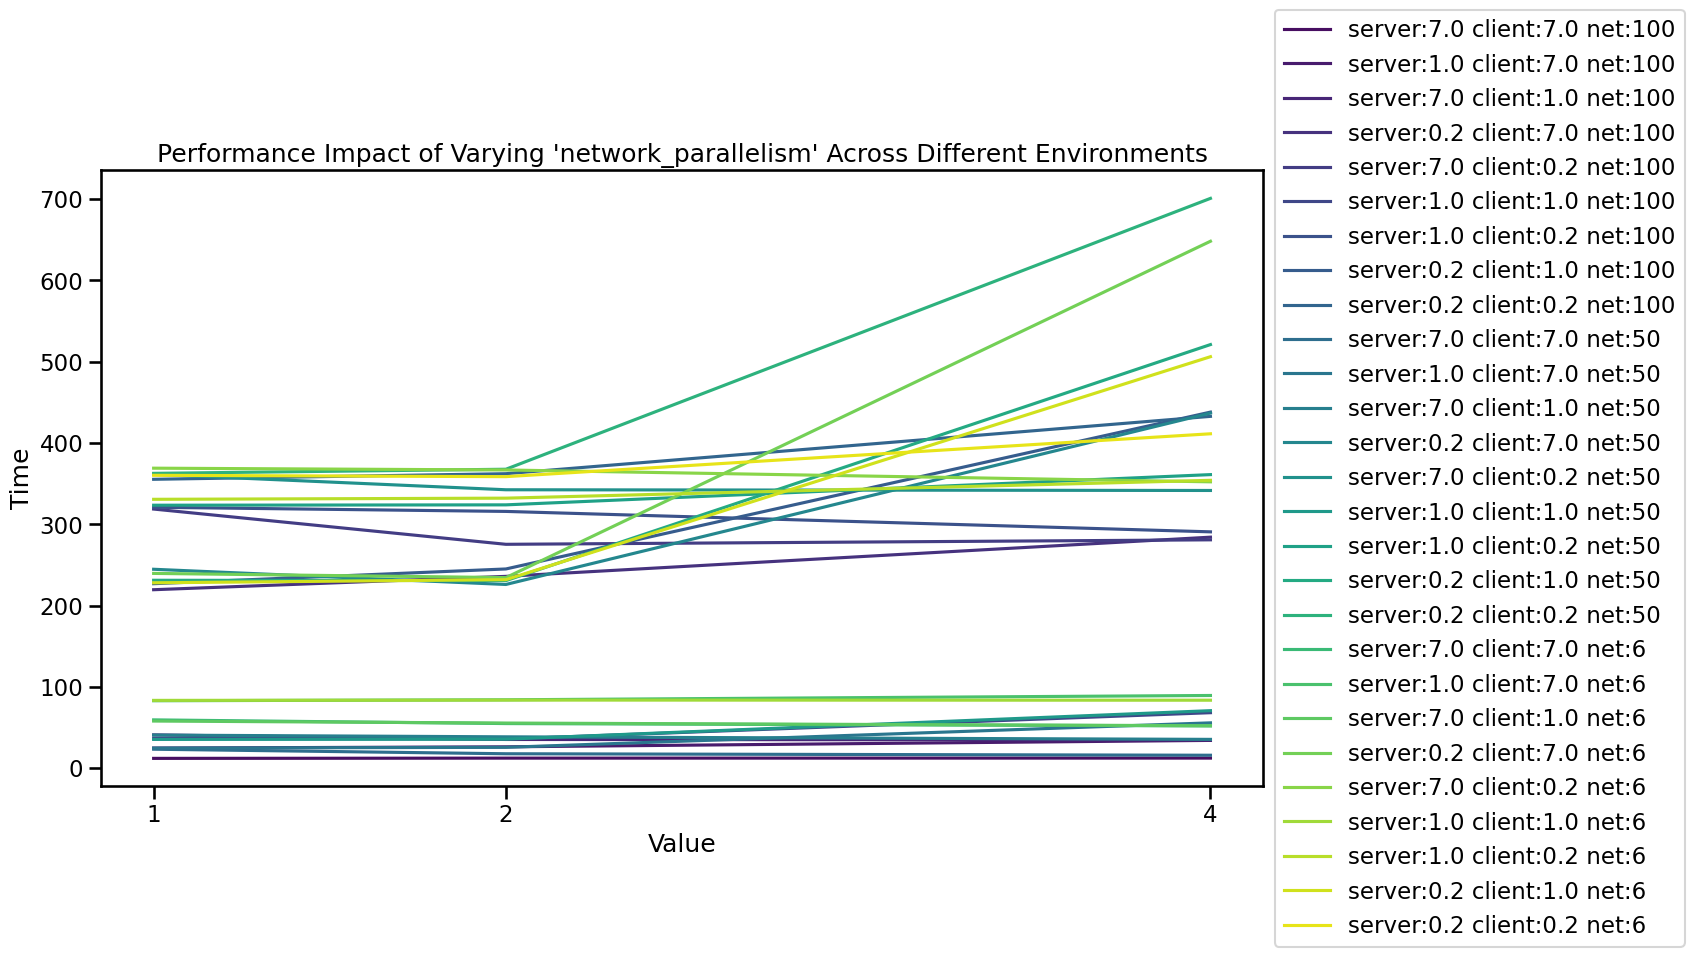

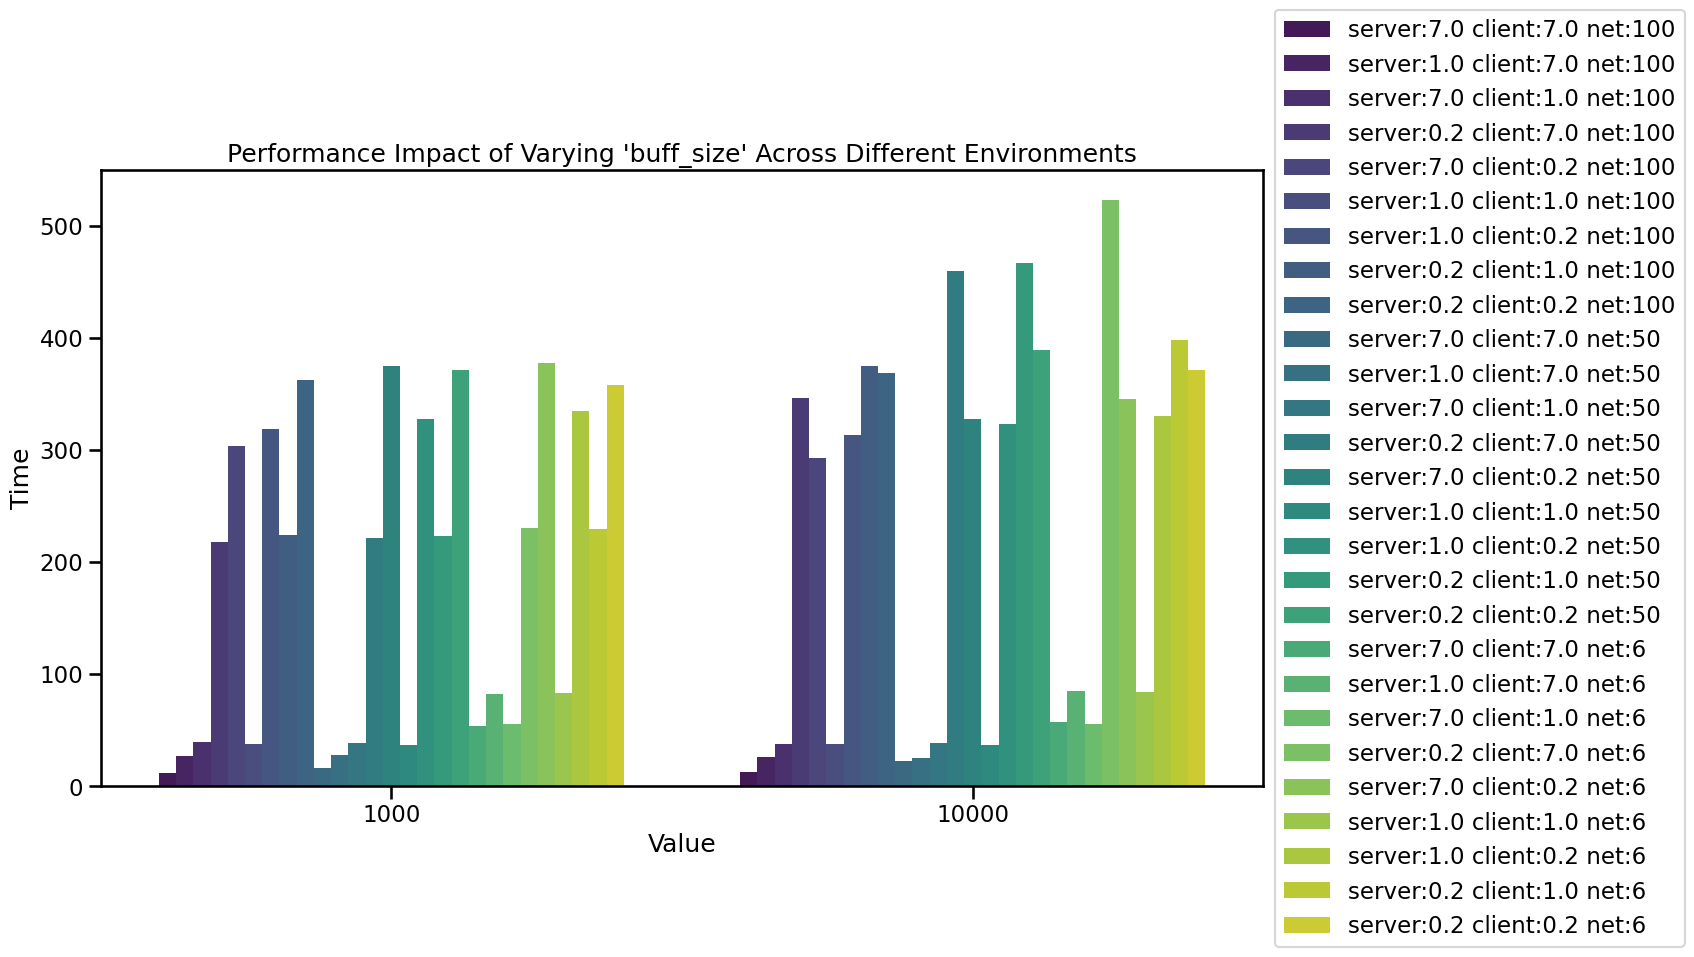

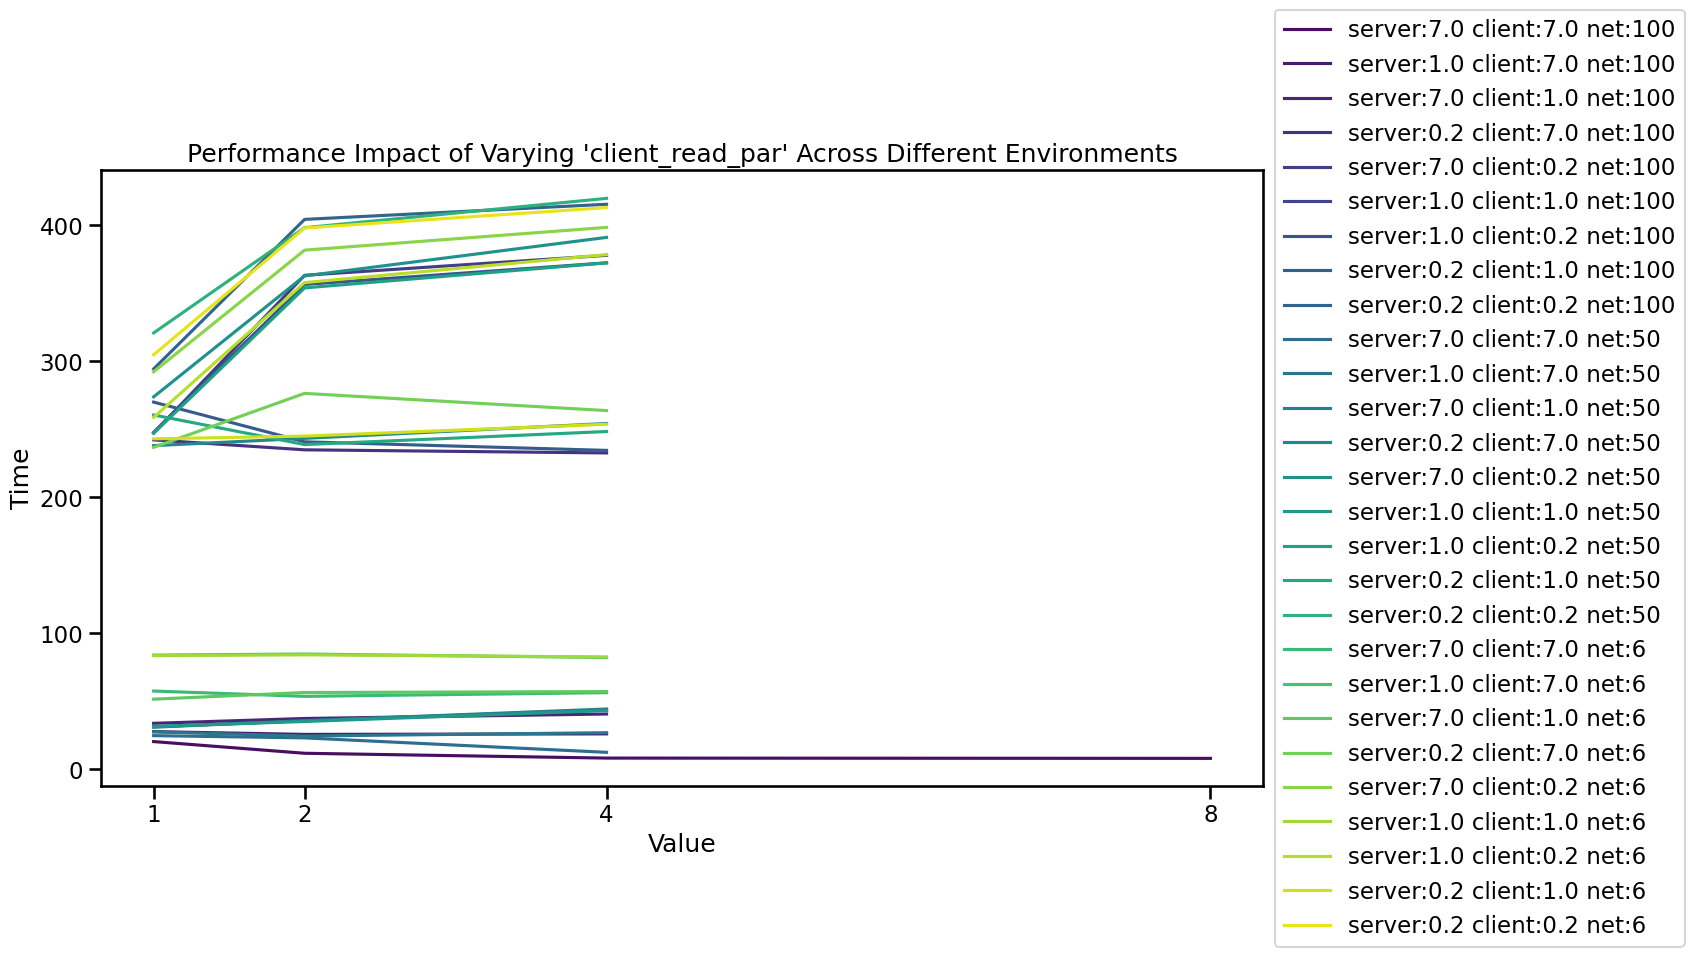

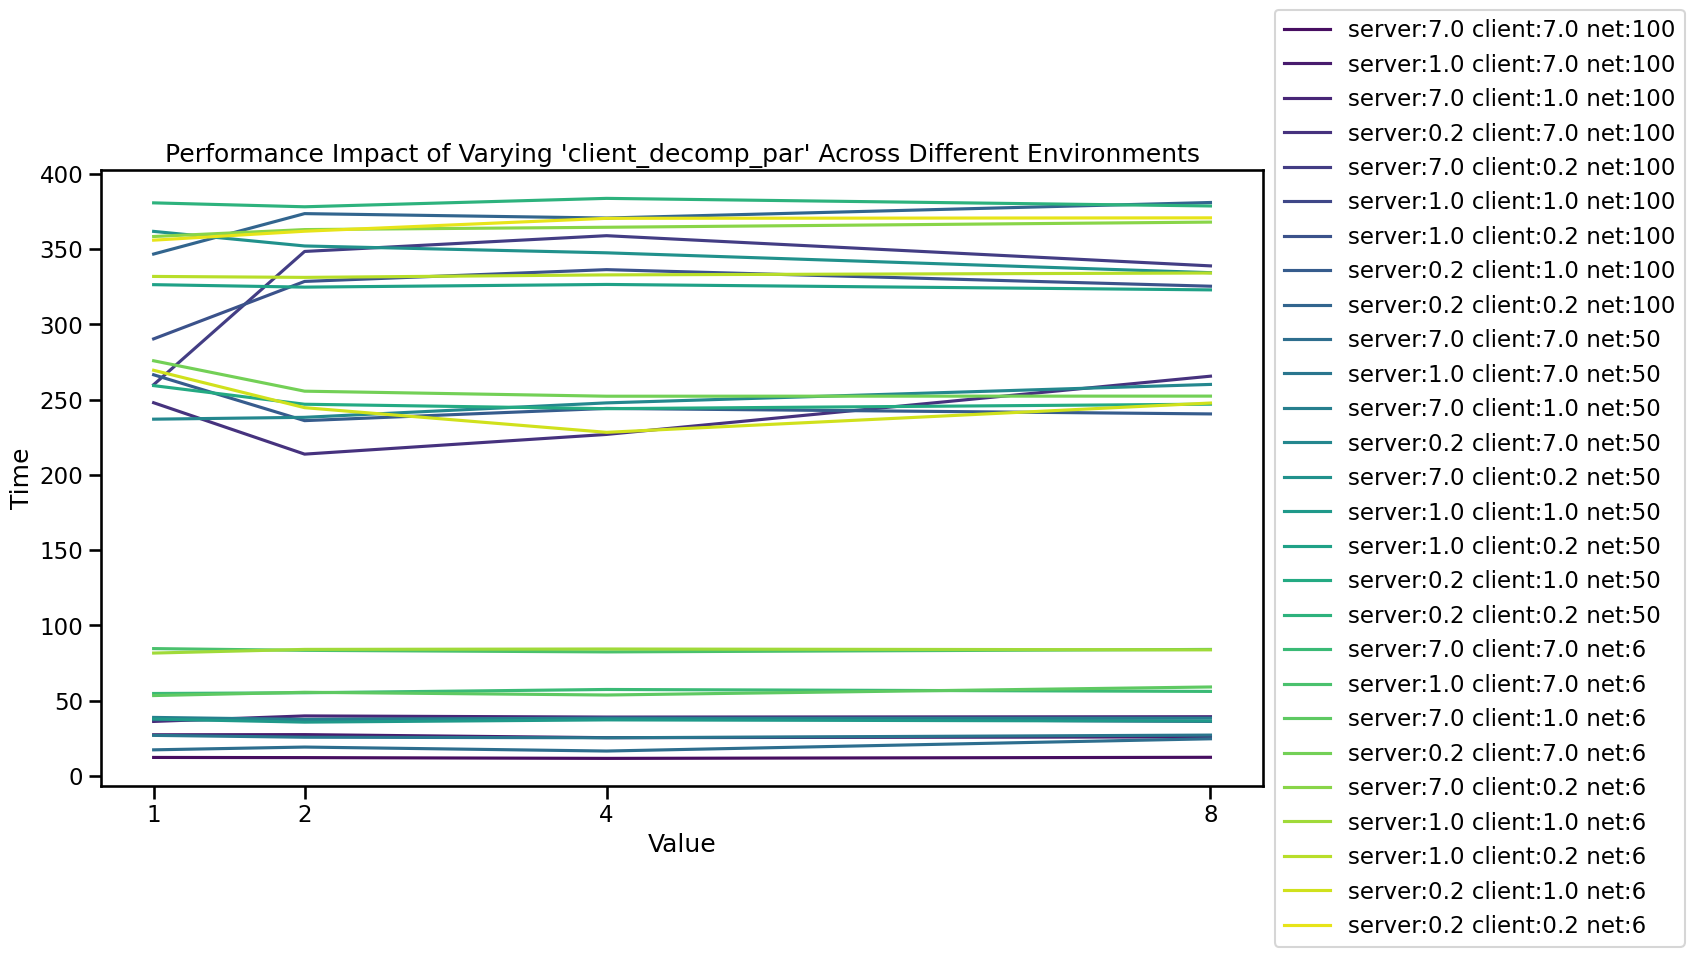

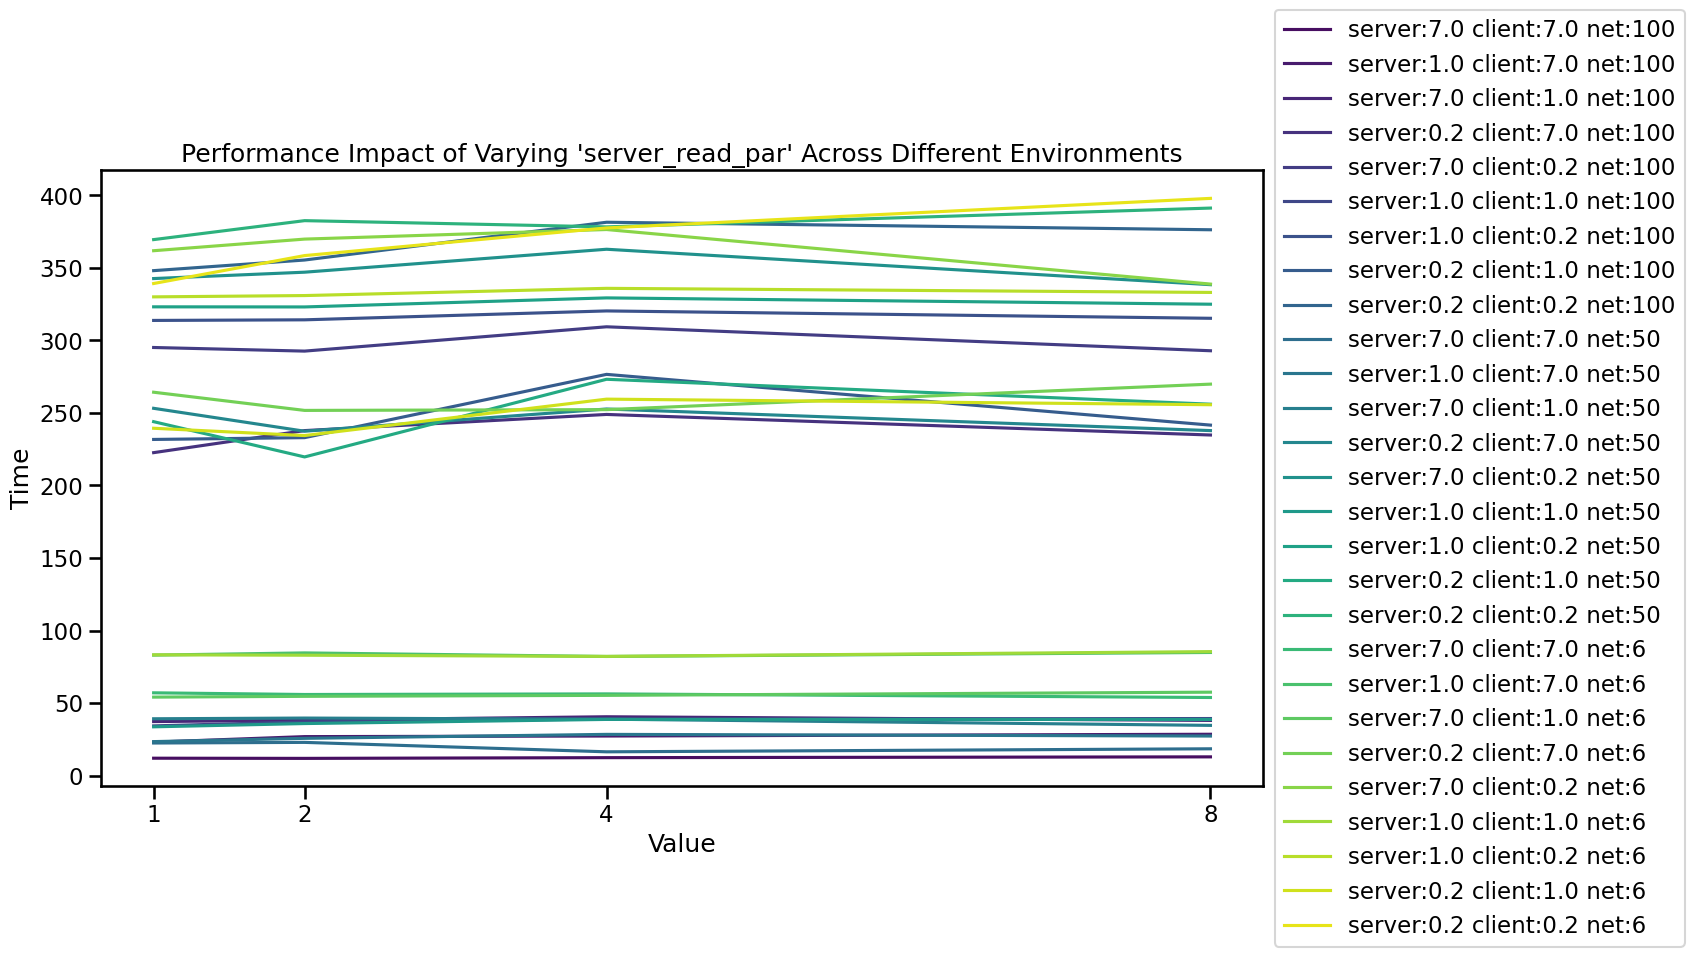

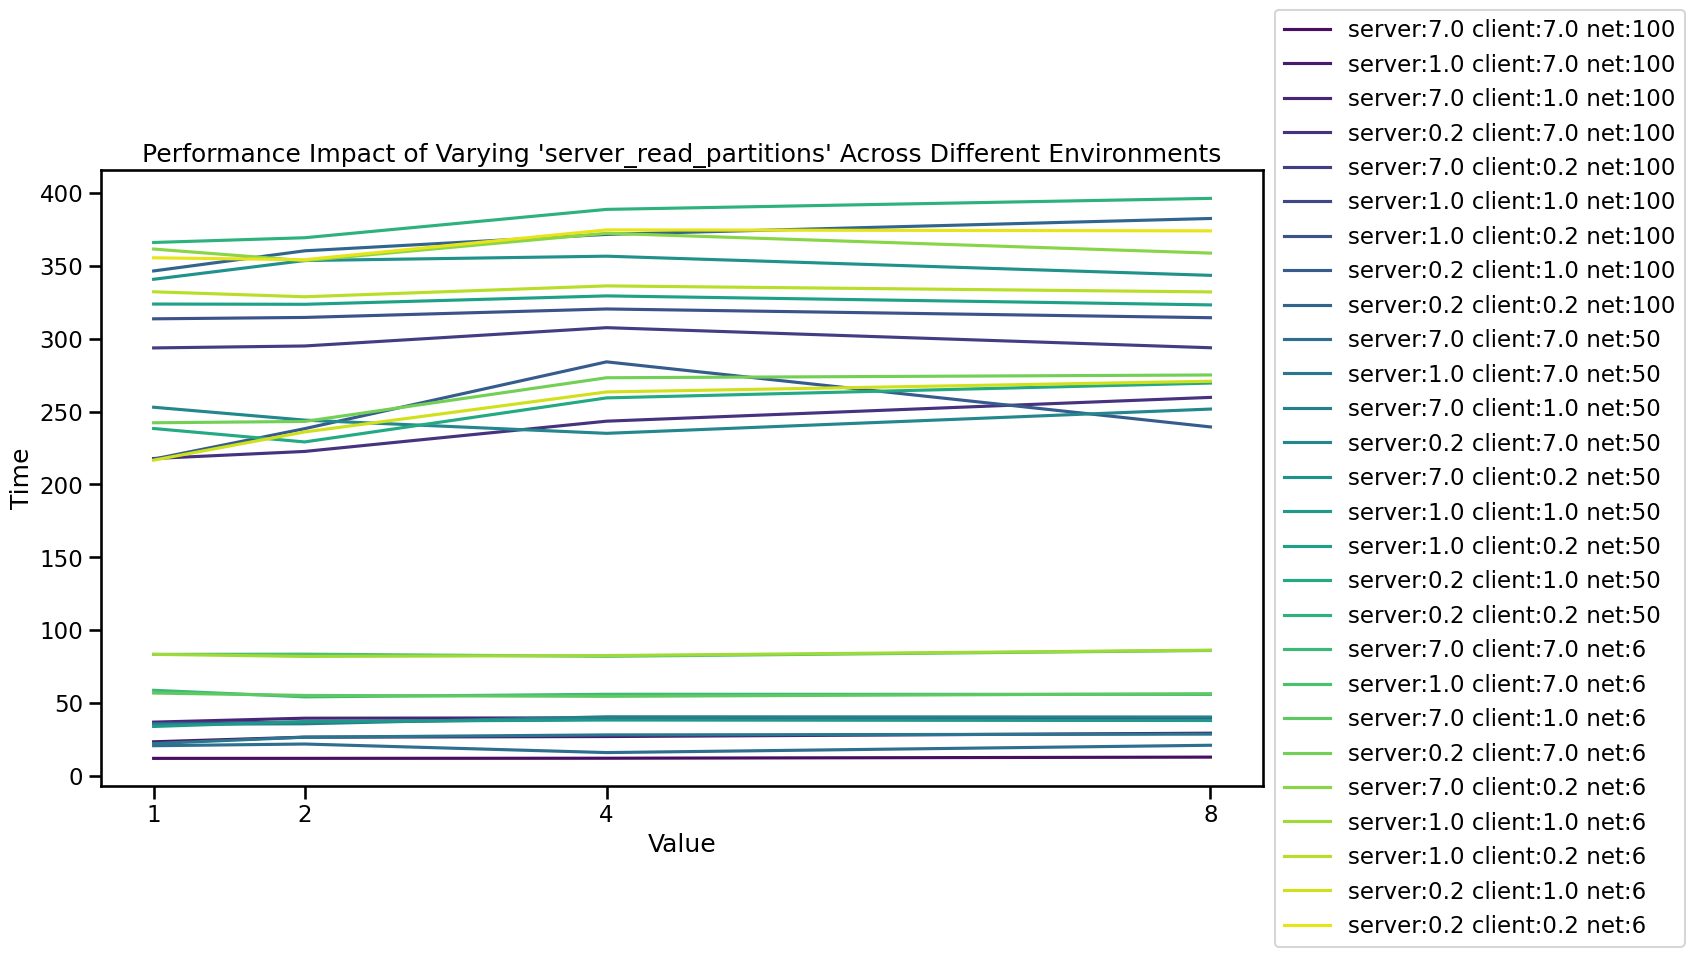

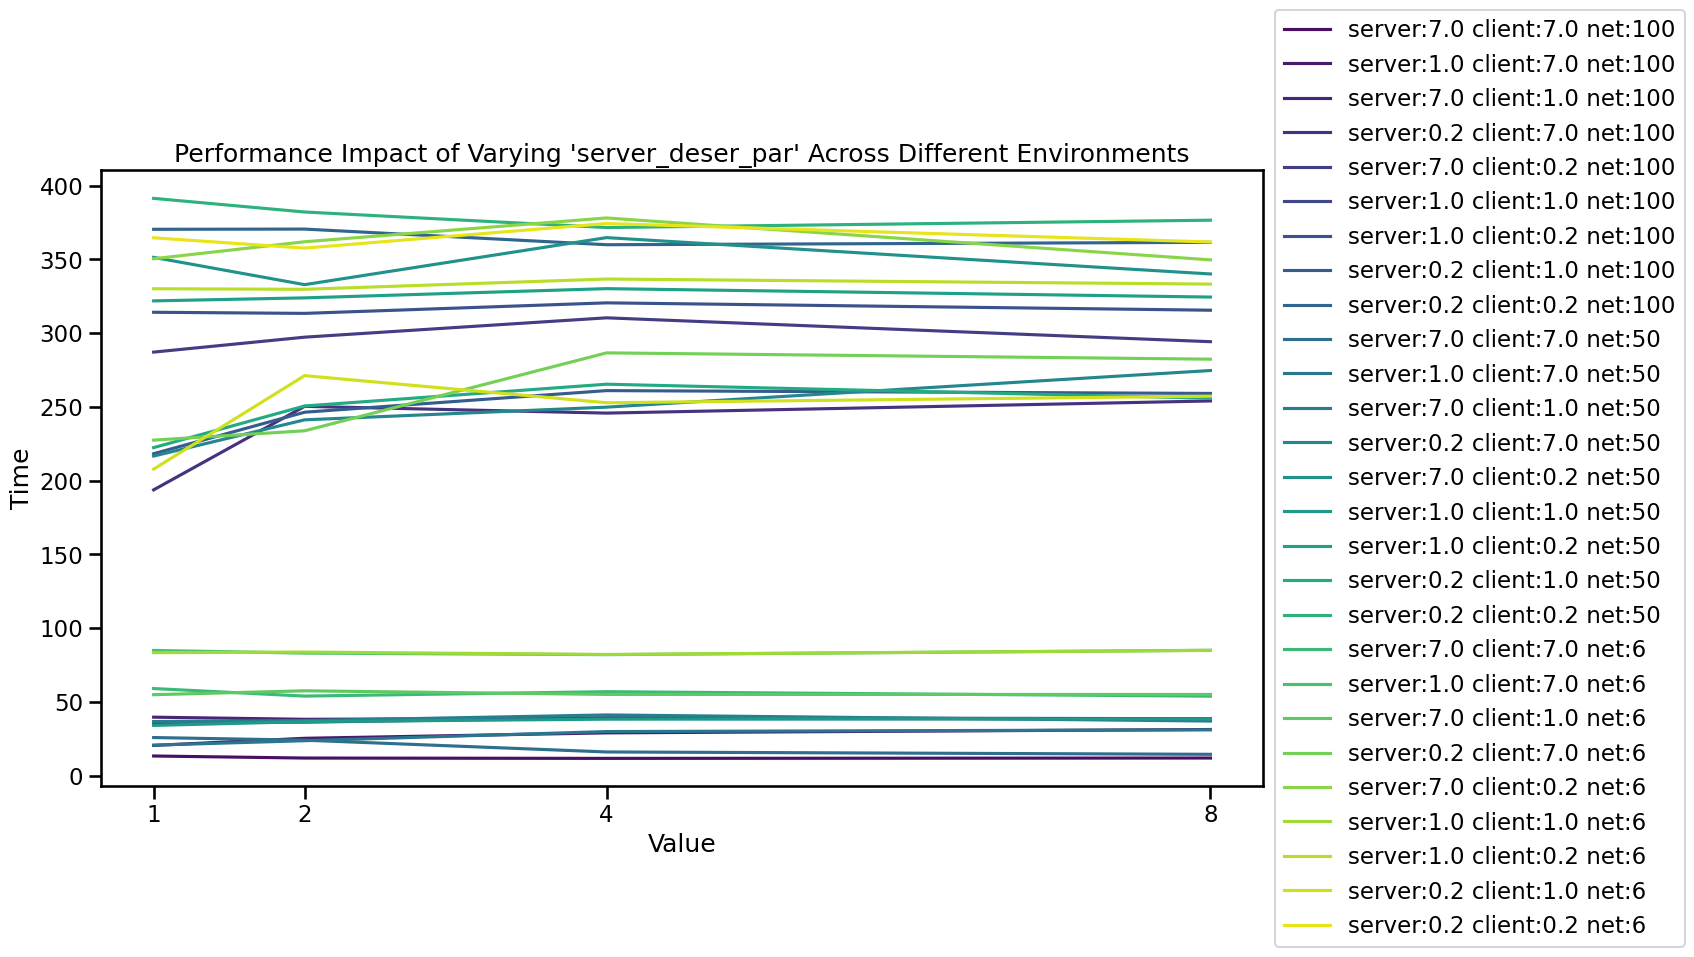

In [319]:
# ...

# A function to compute an environment's strength score
def compute_strength(env):
    server_cpu = float(env.split()[0].split(":")[1])
    client_cpu = float(env.split()[1].split(":")[1])
    network = float(env.split()[2].split(":")[1])
    return server_cpu + client_cpu + network

# Loop through each parameter and create a plot
for param_to_explore in params_to_explore:
    unique_vals = df[param_to_explore].unique()
    
    # Create a placeholder for the data we want to plot
    plot_data = []

    # Loop through each unique combination of server, client CPU, and network
    for server_cpu in unique_server_cpus:
        for client_cpu in unique_client_cpus:
            for network in unique_networks:
                subset = df[(df['server_cpu'] == server_cpu) &
                            (df['client_cpu'] == client_cpu) &
                            (df['network'] == network)]
                
                if subset.empty:
                    continue
                
                for val in unique_vals:
                    avg_time = subset[subset[param_to_explore] == val]['time'].mean()
                    plot_data.append((f"server:{server_cpu} client:{client_cpu} net:{network}", val, avg_time))

    plot_df = pd.DataFrame(plot_data, columns=['Environment', 'Value', 'Time'])
    
    plt.figure(figsize=(15, 8))

    # Determine the order based on environment strength
    env_order = sorted(plot_df['Environment'].unique(), key=compute_strength, reverse=True)
    
    # Create a color palette that matches the number of environments
    num_envs = len(env_order)
    palette = sns.color_palette("viridis", num_envs)

    if param_to_explore in bar_params:
        ax = sns.barplot(data=plot_df, x='Value', y='Time', hue='Environment', hue_order=env_order, palette=palette)
    else:
        ax = sns.lineplot(data=plot_df, x='Value', y='Time', hue='Environment', hue_order=env_order, palette=palette)
        plt.xticks(ticks=unique_vals)  # Set x-ticks to the unique values of the parameter

    # Adjust legend position
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(f"Performance Impact of Varying '{param_to_explore}' Across Different Environments")
    plt.show()

/tmp/ipykernel_358171/1958413886.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_environments = df.groupby('environment').mean()['time'].sort_values().index.tolist()


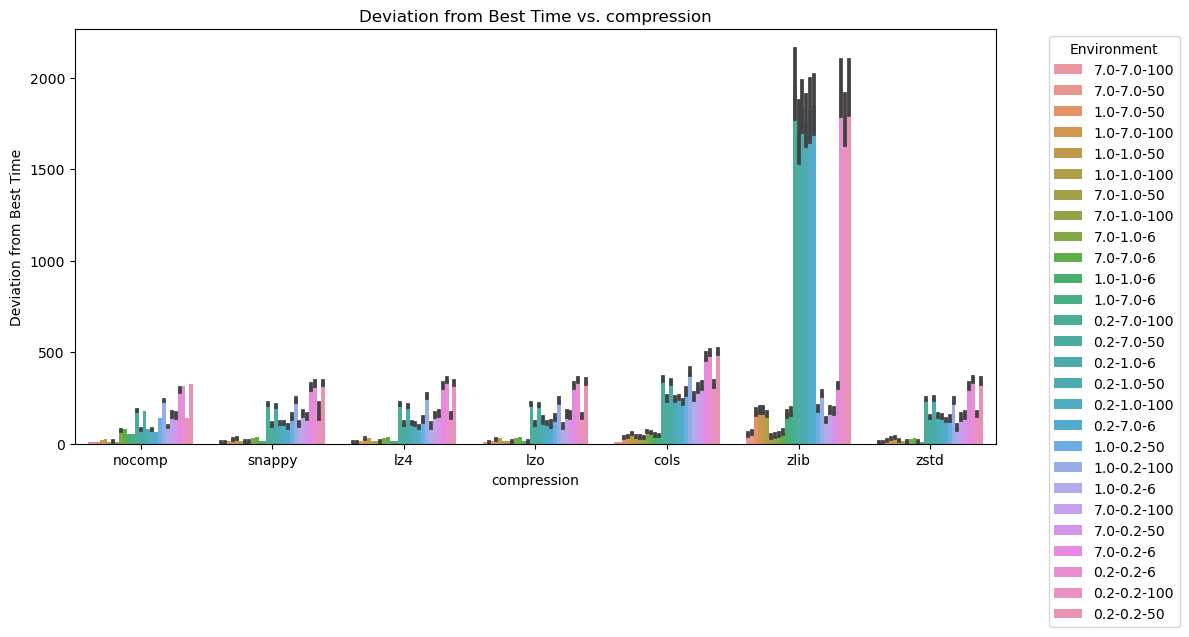

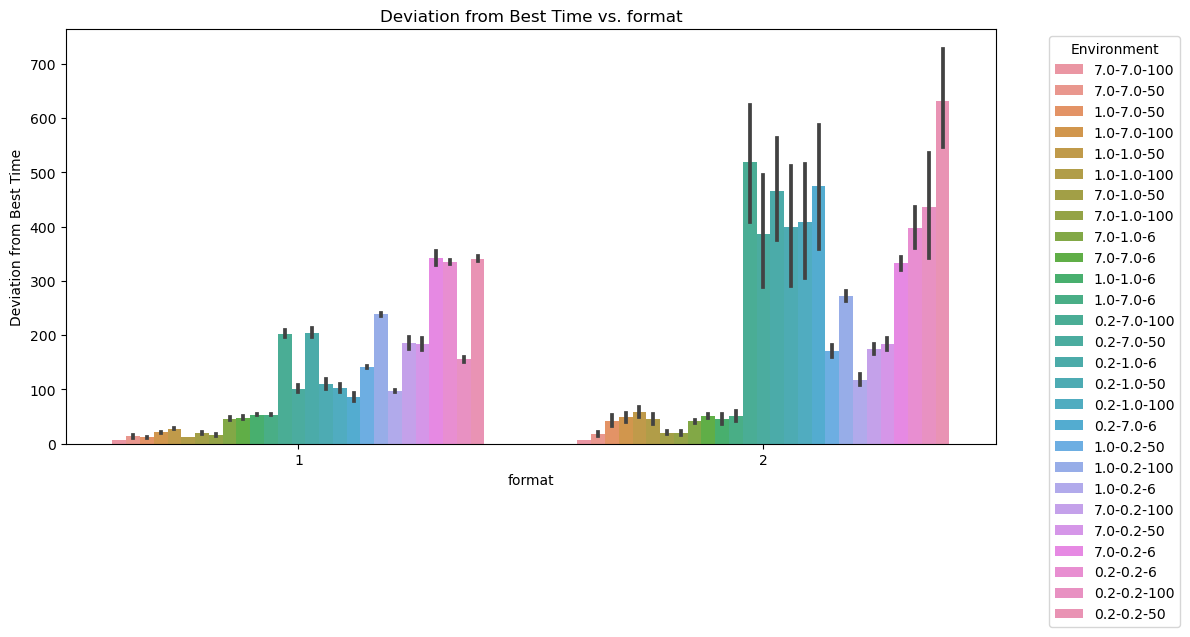

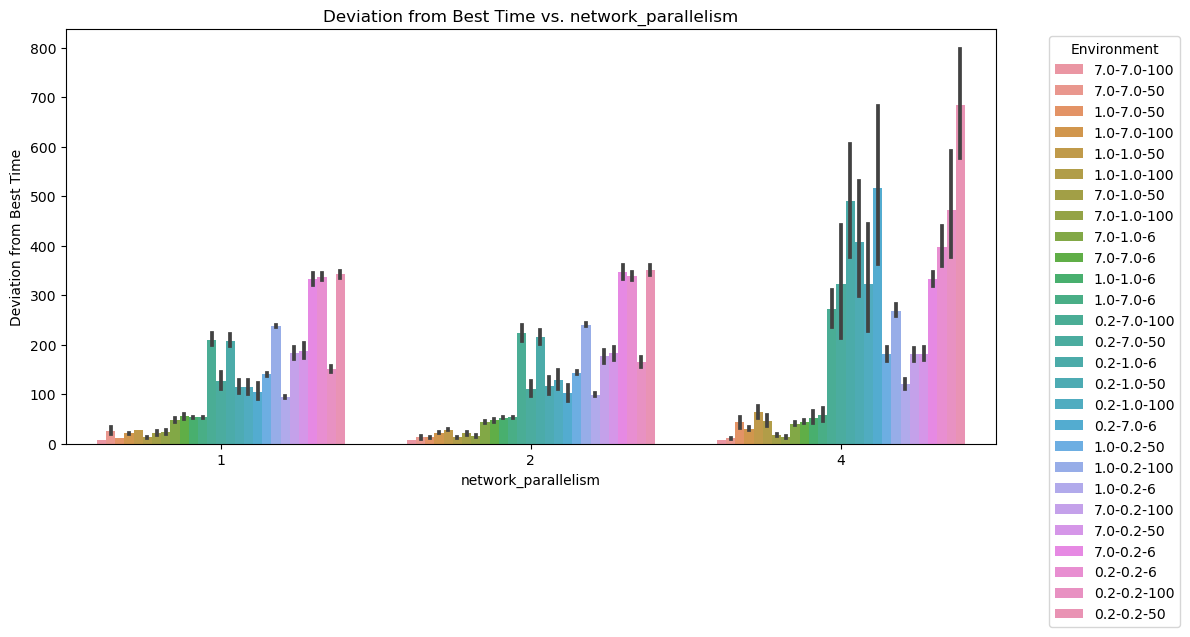

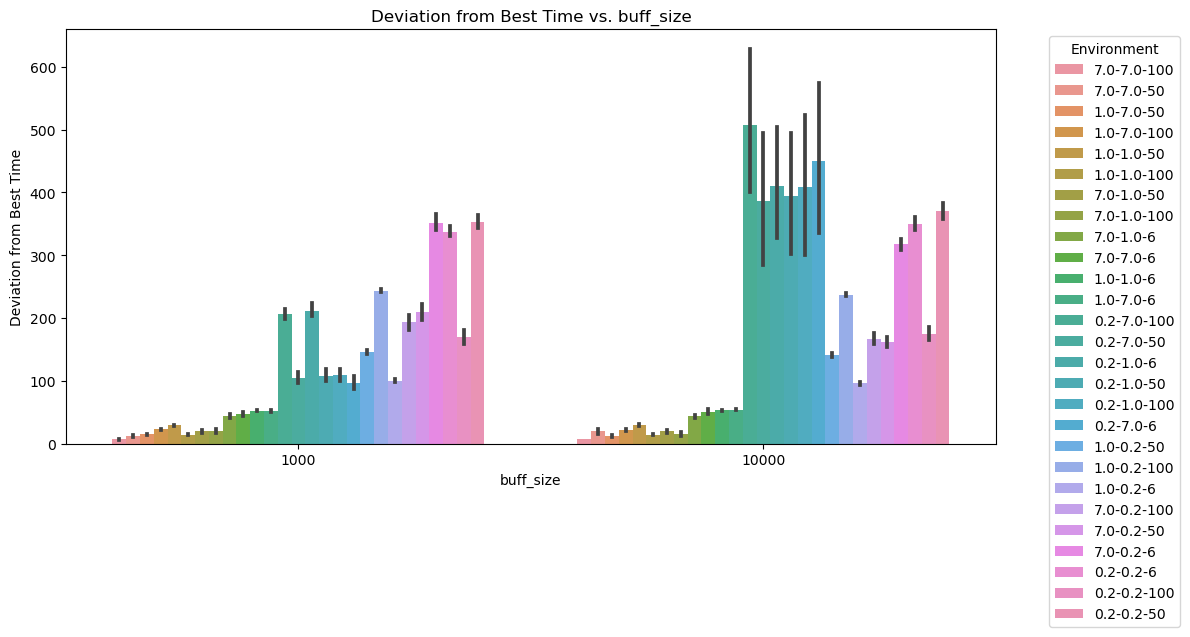

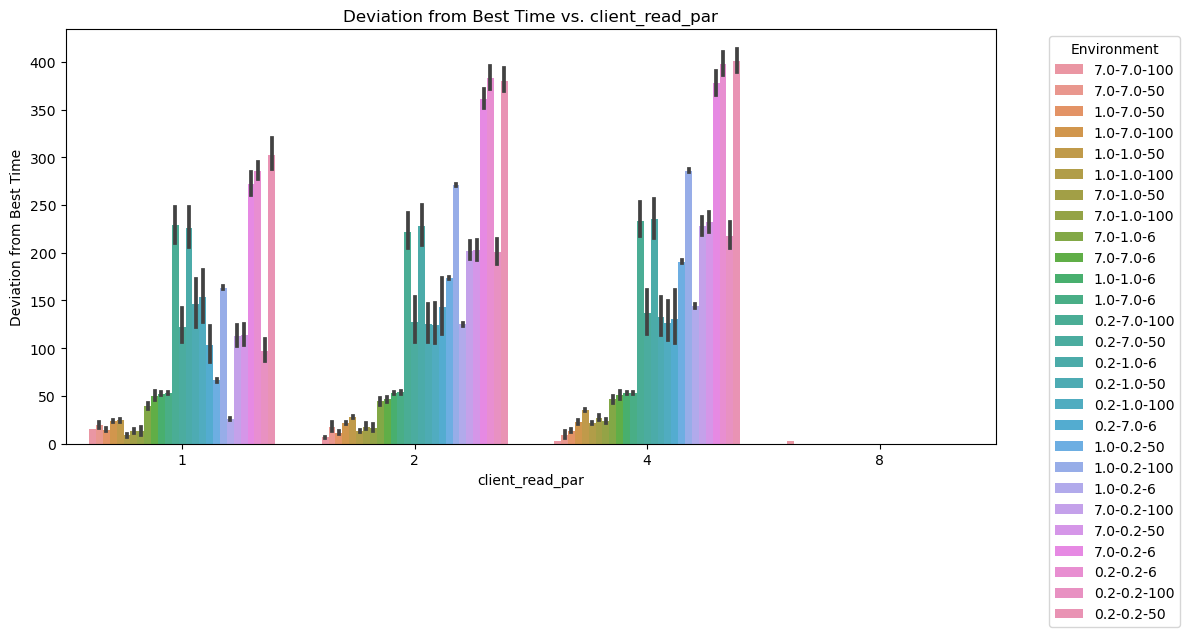

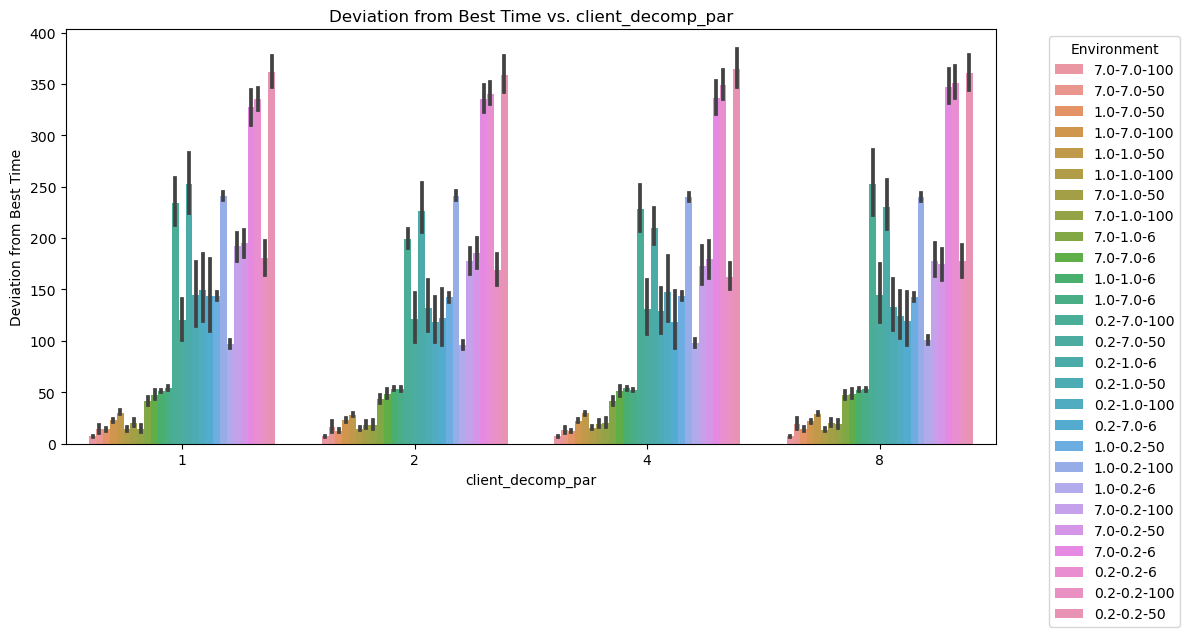

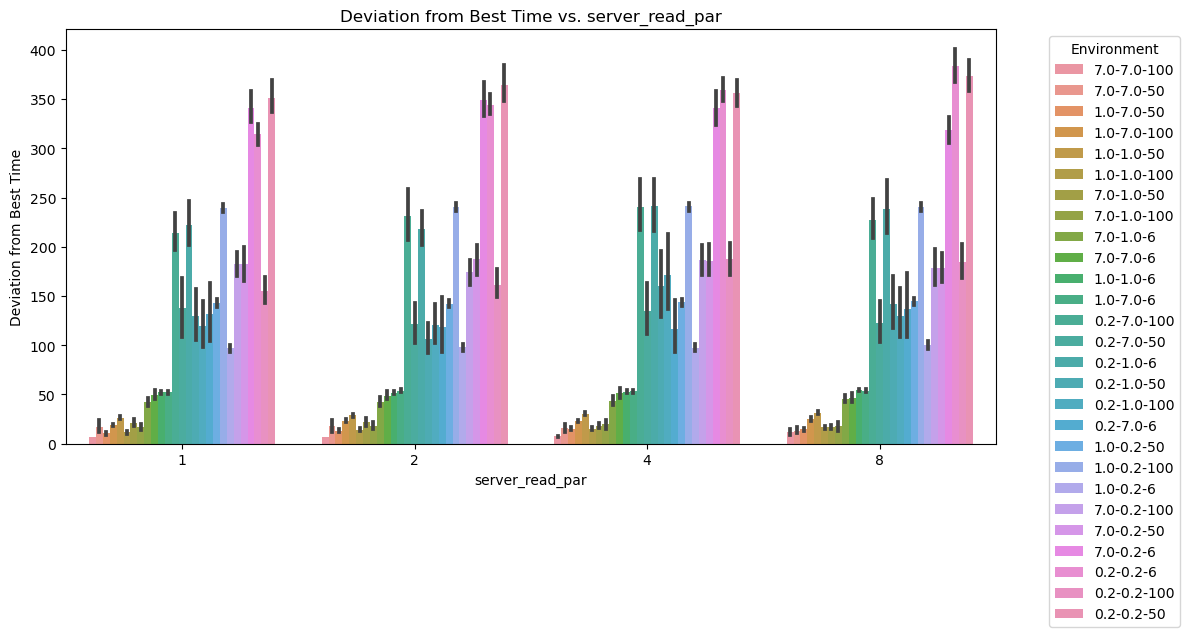

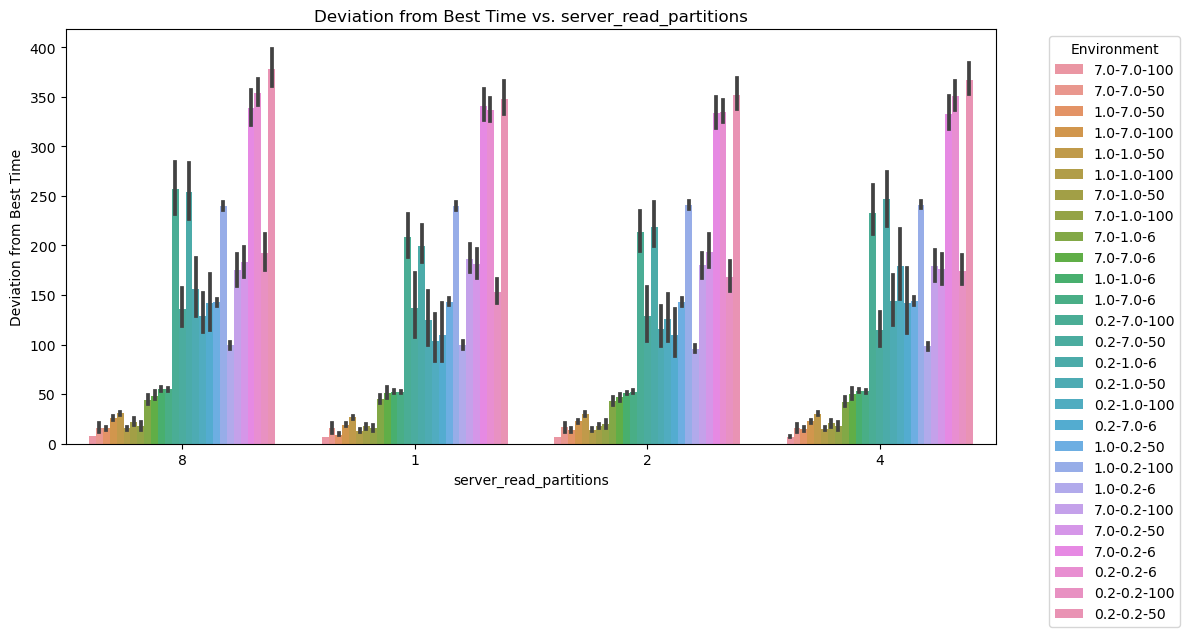

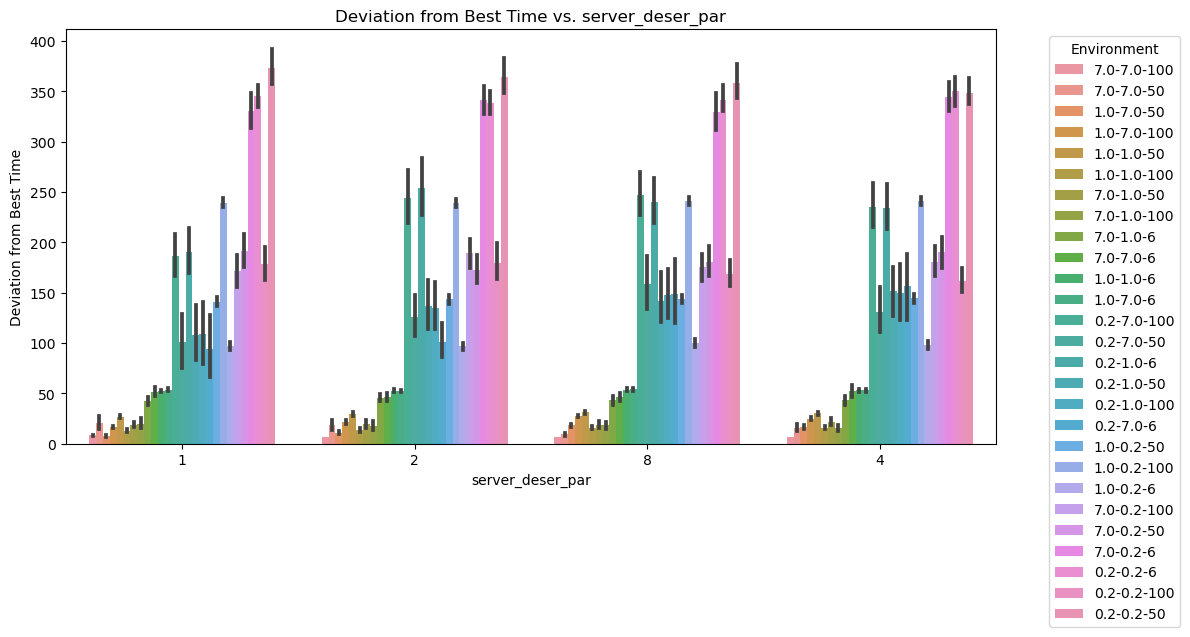

In [185]:
# Define the columns that represent parameters
parameter_columns = [
    'compression', 'format', 'network_parallelism',
    'buff_size', 'client_read_par', 'client_decomp_par',
    'server_read_par', 'server_read_partitions', 'server_deser_par'
]

# Create an environment column for easy grouping
df['environment'] = df['server_cpu'].astype(str) + "-" + df['client_cpu'].astype(str) + "-" + df['network'].astype(str)

# Sort environments by "strength"
sorted_environments = df.groupby('environment').mean()['time'].sort_values().index.tolist()

def plot_param_vs_time(dataframe, param_column):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=param_column, y="deviation", hue="environment", data=dataframe, order=dataframe[param_column].unique(), hue_order=sorted_environments)
    plt.title(f"Deviation from Best Time vs. {param_column}")
    plt.ylabel("Deviation from Best Time")
    plt.legend(title="Environment", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Find the best configuration for each environment
best_configs = df.groupby('environment')['time'].idxmin()

# A dataframe of the best configurations for each environment
best_df = df.loc[best_configs]

# Merging the best configuration times with the original dataframe
merged_df = df.merge(best_df[['environment', 'time']], on='environment', suffixes=('', '_best'))

# Calculate the deviation from the best time for each configuration
merged_df['deviation'] = merged_df['time'] - merged_df['time_best']

# Filter out columns to create the deviation_df
deviation_df = merged_df[['environment'] + parameter_columns + ['deviation']]

# Generate the plots
for param in parameter_columns:
    plot_param_vs_time(deviation_df, param)

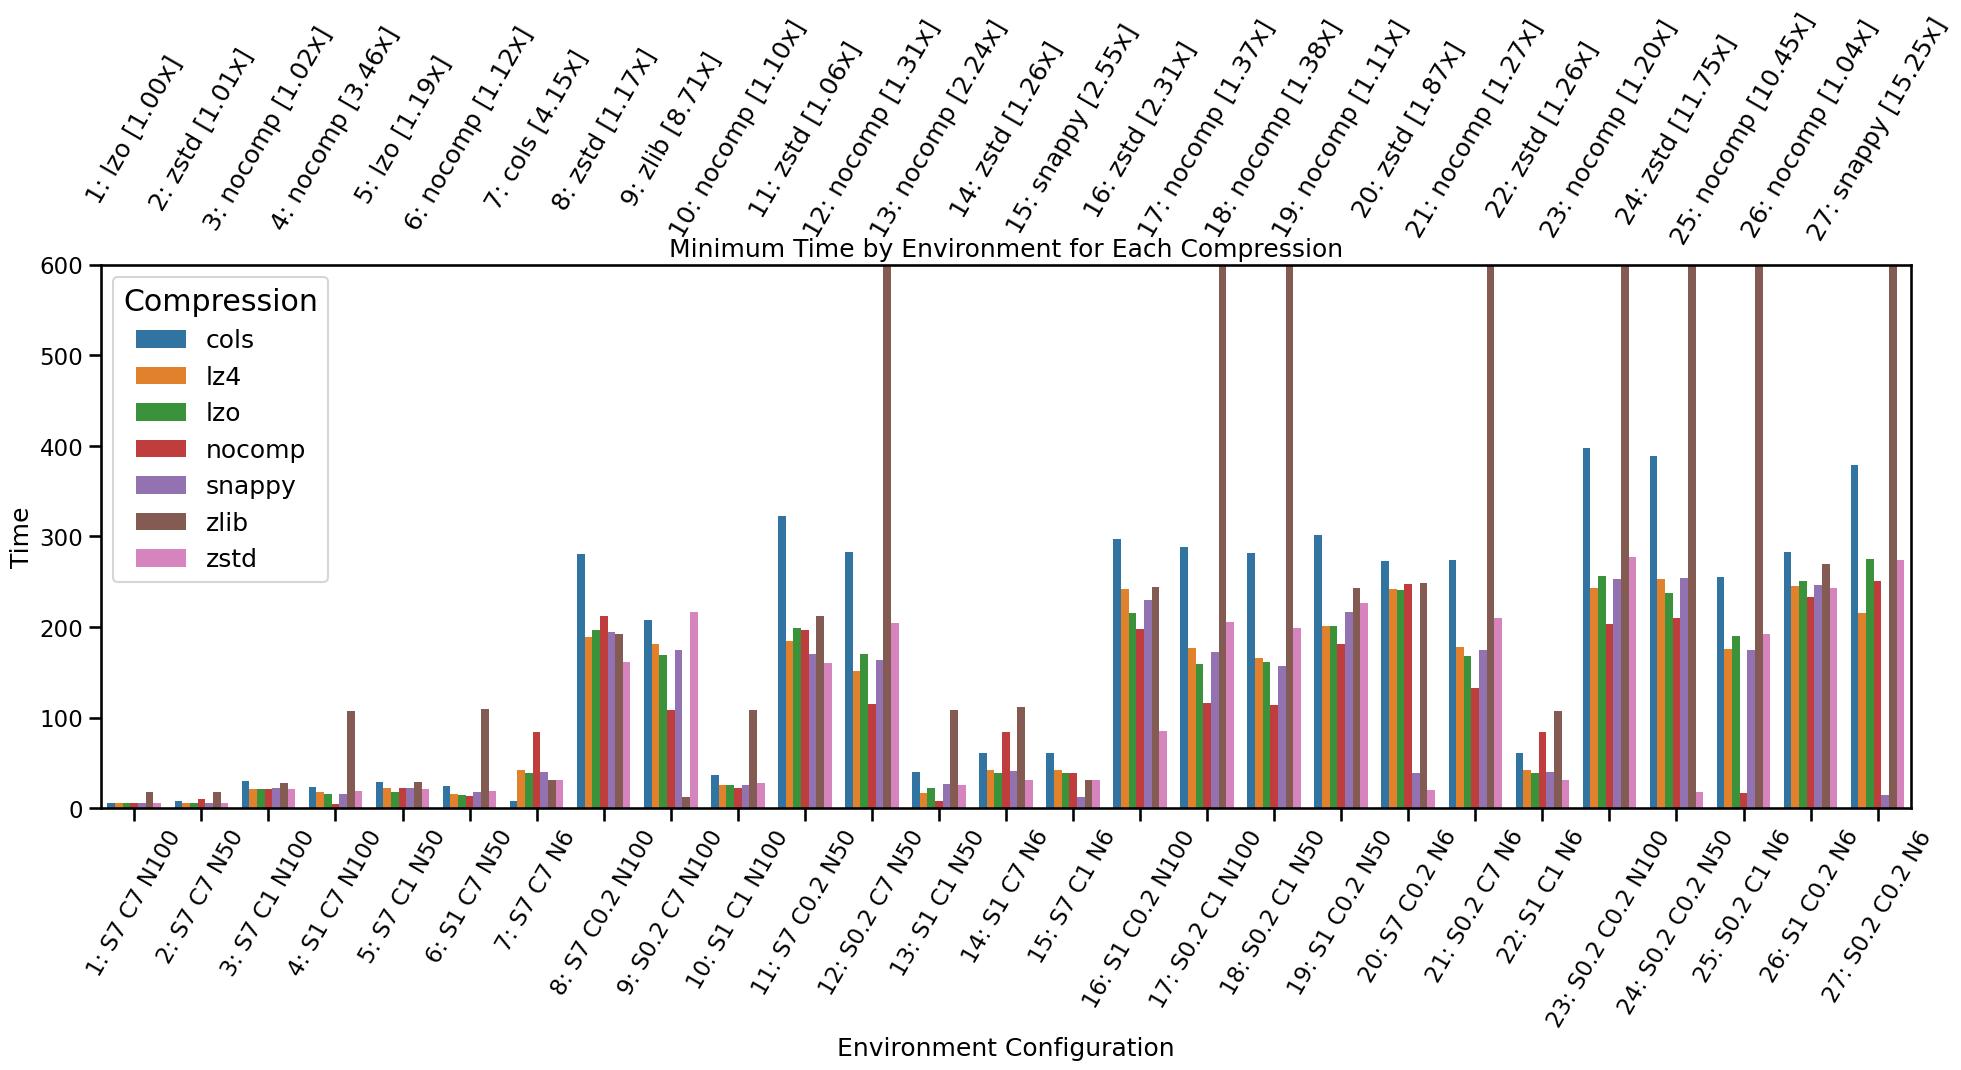

In [318]:
def compute_strength_from_env(env_string):
    values = env_string.split()
    server_cpu = float(values[0][1:])
    client_cpu = float(values[1][1:])
    network = float(values[2][1:])
    return (server_cpu * client_cpu) * network

# Group by environment and compression, then calculate the minimum time
min_time_df = compression_df.groupby(['environment', 'compression']).agg({'time': 'min'}).reset_index()

# Sort the dataframe based on environment strength for plotting
min_time_df['strength'] = min_time_df['environment'].apply(compute_strength_from_env)
min_time_df = min_time_df.sort_values(by='strength', ascending=False).drop(columns='strength')

# Plotting
plt.figure(figsize=(20, 12))
sns.set_context("talk")

# Get the unique sorted environments for plotting
sorted_envs = min_time_df['environment'].unique()

# Assign a unique number to each environment
env_to_identifier = {env: i+1 for i, env in enumerate(sorted_envs)}
min_time_df['identifier'] = min_time_df['environment'].map(env_to_identifier)

# Modify x-ticks to include the identifier
xticks_labels = [f"{env_to_identifier[env]}: {env}" for env in sorted_envs]

sns_bar = sns.barplot(data=min_time_df, x='environment', y='time', hue='compression', errorbar=None)
sns_bar.set_xticklabels(xticks_labels)
plt.ylim(0, 600)
plt.title('Minimum Time by Environment for Each Compression')
plt.ylabel('Time')
plt.xlabel('Environment Configuration')
plt.legend(title='Compression', loc='upper left', fontsize='medium', title_fontsize='large')
plt.xticks(rotation=60)

# Annotate the bars
for i, env in enumerate(sorted_envs):
    identifier = env_to_identifier[env]
    env_data = min_time_df[min_time_df['environment'] == env]
    best_time = env_data['time'].min()
    best_compression = env_data[env_data['time'] == best_time]['compression'].values[0]
    second_best_time = env_data[env_data['time'] != best_time]['time'].min()
    improvement_factor = second_best_time / best_time
    
    plt.text(i, 750, f"{identifier}: {best_compression} [{improvement_factor:.2f}x]", ha='center', rotation=60, va='center', fontsize='medium')

plt.tight_layout()
plt.show()


In [342]:
# Sample data (replace with your data loading step)
# df = pd.read_csv('your_data_file.csv')

df_copy = df.copy()
df_copy = df_copy[df_copy["time"]>3]

# Create a column 'environment' that is a combination of server, client, and network
df_copy['environment'] = "S"+df_copy['server_cpu'].map(str) + " C" + df_copy['client_cpu'].map(str) + " N" + df_copy['network'].map(str)

# Group by environment and count unique time values
unique_time_counts = df_copy.groupby('environment')['time'].nunique()

# Filter environments with only one unique time value
single_time_environments = unique_time_counts[unique_time_counts == 1]
print(single_time_environments)

# Function to get the best and second best times for each environment
def get_times(group):
    sorted_times = group.sort_values('time')
    best_time = sorted_times.iloc[0]['time']
    if len(sorted_times) > 1:
        second_best_time = sorted_times.iloc[1]['time']
    else:
        second_best_time = np.nan
    return pd.Series([best_time, second_best_time], index=['best_time', 'second_best_time'])

times_df = df_copy.groupby('environment').apply(get_times).reset_index()

# Merge the df_copy with times_df to get best_time and second_best_time columns for each environment
df_copy = df_copy.merge(times_df, on='environment')

# Filter rows where time equals the best time for each environment
best_configs_df = df_copy[df_copy['time'] == df_copy['best_time']].copy()

# Calculate speedup column
best_configs_df['speedup'] = best_configs_df['second_best_time'] / best_configs_df['best_time']

print(best_configs_df[['environment', 'compression', 'format', 'buff_size', 'time', 'speedup']])


Series([], Name: time, dtype: int64)
          environment compression  format  buff_size    time    speedup
3644   S1.0 C7.0 N100      nocomp       2       1000    4.42   2.574661
6389   S0.2 C7.0 N100        zlib       1       1000   12.48   8.710737
8101   S1.0 C1.0 N100      nocomp       1      10000   22.72   1.003081
11252  S0.2 C1.0 N100      nocomp       1       1000  116.17   1.005940
16665  S1.0 C0.2 N100        zstd       1       1000   85.67   2.254815
18001  S0.2 C0.2 N100      nocomp       1       1000  203.46   1.037698
25652   S1.0 C7.0 N50      nocomp       2       1000   12.98   1.002311
26188   S0.2 C7.0 N50      nocomp       1       1000  115.39   1.004940
30888   S1.0 C1.0 N50      nocomp       2       1000    7.34   2.235695
32628   S0.2 C1.0 N50      nocomp       1       1000  113.49   1.009957
33340   S1.0 C0.2 N50      nocomp       1       1000  180.67   1.010406
39958   S0.2 C0.2 N50        zstd       2      10000   17.86  11.752520
43561    S1.0 C7.0 N6      

In [1]:
# Copy the dataframe to prevent modifying the original
df_copy = df.copy()

# Create a new 'environment' column
df_copy['environment'] = "S" + df_copy['server_cpu'].map(str) + " C" + df_copy['client_cpu'].map(str) + " N" + df_copy['network'].map(str)

# Group by environment and configuration and calculate mean time for each combination
grouped = df_copy.groupby(['environment', 'compression', 'format', 'buff_size'])

# Find the configuration with the minimum mean time for each environment
idx = grouped['time'].transform(min) == df_copy['time']

# Create a dataframe with the best configurations
best_configs_df = df_copy[idx].copy()

# Sort values for better visualization
best_configs_df = best_configs_df.sort_values(by=['environment', 'time'])

# Add a 'speedup' column that indicates how much faster the best configuration is compared to the second-best
best_configs_df['speedup'] = best_configs_df.groupby('environment')['time'].transform(lambda x: x.iloc[1] / x.iloc[0])

# Keep only the first row for each environment (the best configuration)
best_configs_df = best_configs_df.drop_duplicates(subset=['environment'], keep='first')

# Define a function to check missing configs for a specific environment
def missing_configs_for_env(env):
    # Filter df_copy for the specific environment
    specific_env_df = df_copy[df_copy['environment'] == env]
    
    # Check if each best configuration is present in the specific environment
    missing_configs = []
    for idx, row in best_configs_df.iterrows():
        condition = (specific_env_df['compression'] == row['compression']) & \
                    (specific_env_df['format'] == row['format']) & \
                    (specific_env_df['buff_size'] == row['buff_size']) & \
                    (specific_env_df['network_parallelism'] == row['network_parallelism']) & \
                    (specific_env_df['client_read_par'] == row['client_read_par']) & \
                    (specific_env_df['client_decomp_par'] == row['client_decomp_par']) & \
                    (specific_env_df['server_read_par'] == row['server_read_par']) & \
                    (specific_env_df['server_read_partitions'] == row['server_read_partitions']) & \
                    (specific_env_df['server_deser_par'] == row['server_deser_par'])
                    
        if not specific_env_df[condition].shape[0]:
            missing_configs.append(row[['compression', 'format', 'buff_size', 'network_parallelism', 
                                       'client_read_par', 'client_decomp_par', 
                                       'server_read_par', 'server_read_partitions', 'server_deser_par']])
    
    return len(missing_configs)

# Create a dataframe summarizing missing configurations for each environment
envs = df_copy['environment'].unique()
missing_counts = [missing_configs_for_env(env) for env in envs]
summary_df = pd.DataFrame({'Environment': envs, 'Missing Config Count': missing_counts})

# Display the summary dataframe
summary_df


NameError: name 'df' is not defined